# Before lecture

- project
- presentation
- Final Exam
    - Nov 3rd, 1:55-3pm including 5 mins reading time.
    - Prest Theatre
    - Tiny chance to change if the time conflicts with other exams.


# House Keeping

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV

import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale

from sklearn.tree import export_graphviz, plot_tree, DecisionTreeRegressor, DecisionTreeClassifier
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.datasets import load_iris
import shap



# Reading

1. Textbook Page 261-283


# Nonparametric Modelling

- You see nonparametric modelling earlier than you think. For example, $\overline{X}$ is nonparametric.
- Nonparametrics tend to overfit, except for Bayesian.
- **Curse of dimensionality**
- **Semiparametric** models
- A tool is **bagging**, also known as **model averaging**.

# Decision Tree

<img src="https://www.dropbox.com/s/mhwpjh8woogbr4a/decision_Tree.png?dl=1">

- Trees are **hierarchical**. You need a series of steps to the conclusion.
- **node**
- final decision is the **leaf node**
- **root**
- Each node except the root has a parent.
- Each node except the leaves has two children.

<img src="https://www.dropbox.com/s/m1u6izrac3uj8yr/tree2.png?dl=1" width=400>

To predict, compute the sample average (or proportion) in the leaf depending on the loss function. Most results are intuitive.

A split of a node with data $\{x_i, y_i\}_{i=1}^n$ (this could be a subset after several splits).
- $x_i$ is a vector. Split on an element $x_{ij}$.
- splitting at $j$ th element produces two children
  - $\text{left:} \{x_k, y_k: x_{kj}\leq x_{ij}\}$
  - $\text{right:} \{x_k, y_k: x_{kj}>x_{ij}\}$
- Loss function is (9.1)
  $\sum\limits_{k\in \text{left}}(y_k-\overline{y}_{\text{left}})^2+\sum\limits_{k\in \text{right}}(y_k-\overline{y}_{\text{right}})^2$

This method is called classification and regression tree (**CART**).

## CART (algorithm 23)

Being with the root containing the full sample
1. Find location $x_{ij}$ that minimizes the loss (9.1)
1. Split accordingly
1. Repeat these steps for each child.

The procedure is repeated until a leaf node reaches a minimum size.



## NBC

In [2]:
nbc = pd.read_csv("https://www.dropbox.com/s/28tqjgnmym6re1s/nbc_showdetails.csv?dl=1")
nbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Show      40 non-null     object 
 1   Network   40 non-null     object 
 2   PE        40 non-null     float64
 3   GRP       40 non-null     float64
 4   Genre     40 non-null     object 
 5   Duration  40 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [3]:
demos = pd.read_csv("https://www.dropbox.com/s/7k7za30jzqoenmx/nbc_demographics.csv?dl=1")
demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Show                              40 non-null     object 
 1   TERRITORY.EAST.CENTRAL            40 non-null     float64
 2   TERRITORY.NORTHEAST               40 non-null     float64
 3   TERRITORY.PACIFIC                 40 non-null     float64
 4   TERRITORY.SOUTHEAST               40 non-null     float64
 5   TERRITORY.SOUTHWEST               40 non-null     float64
 6   TERRITORY.WEST.CENTRAL            40 non-null     float64
 7   COUNTY.SIZE.A                     40 non-null     float64
 8   COUNTY.SIZE.B                     40 non-null     float64
 9   COUNTY.SIZE.C                     40 non-null     float64
 10  COUNTY.SIZE.D                     40 non-null     float64
 11  WIRED.CABLE.W.PAY                 40 non-null     float64
 12  WIRED.CABL

In [4]:
demos.head()

Show  TERRITORY.EAST.CENTRAL  TERRITORY.NORTHEAST  \
0             Living with Ed                  6.1611              19.0758   
1               Monarch Cove                 10.3289              14.0132   
2                   Top Chef                  7.5190              23.8271   
3          Iron Chef America                 12.8118              25.1617   
4  Trading Spaces: All Stars                 11.9926              15.1292   

   TERRITORY.PACIFIC  TERRITORY.SOUTHEAST  TERRITORY.SOUTHWEST  \
0            28.7915              17.5355               7.7014   
1            11.1184              37.1053              15.7237   
2            19.6066              17.8652              14.1160   
3            21.7123              20.1879              10.5482   
4            17.1587              16.7897              16.2362   

   TERRITORY.WEST.CENTRAL  COUNTY.SIZE.A  COUNTY.SIZE.B  COUNTY.SIZE.C  ...  \
0                 20.7346        48.6967        31.3981        13.3886  ...   
1                 11.6447        35.1316        32.2368        15.9211  ...   
2                 16.9637        48.2483        31.3255        13.3579  ...   
3                  9.6397        46.9664        30.3819        12.5038  ...   
4                 22.6937        28.5978        37.6384        16.7897  ...   

   FEMALE.HOH  INCOME.30.74K.  INCOME.75K.  HISPANIC.ORIGIN  \
0     61.6114         31.0427      56.8720           9.5972   
1     61.3158         43.5526      20.4605          12.3026   
2     51.3829         39.0699      44.0484          11.1248   
3     48.7989         44.3640      44.6104           8.7003   
4     58.1181         37.2694      47.0480           9.9631   

   NON.HISPANIC.ORIGIN  HOME.IS.OWNED  HOME.IS.RENTED  PC.NON.OWNER  \
0              90.1659        76.8957         22.9858       12.5592   
1              87.6974        71.5132         28.6184       21.8421   
2              88.8547        65.7242         34.2348       13.5218   
3              91.2997        74.8075         25.1925        8.6849   
4              90.2214        75.0923         24.9077       11.9926   

   PC.OWNER.WITH.INTERNET.ACCESS  PC.OWNER.WITHOUT.INTERNET.ACCESS  
0                        77.9621                            9.3602  
1                        62.9605                           15.1974  
2                        80.1475                            6.3716  
3                        84.7244                            6.5445  
4                        85.9779                            2.0295  

[5 rows x 57 columns]

In [5]:
# Drop the 'Show' column
X = demos.drop(columns=['Show'])

# Target variable
y = nbc['Genre']

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

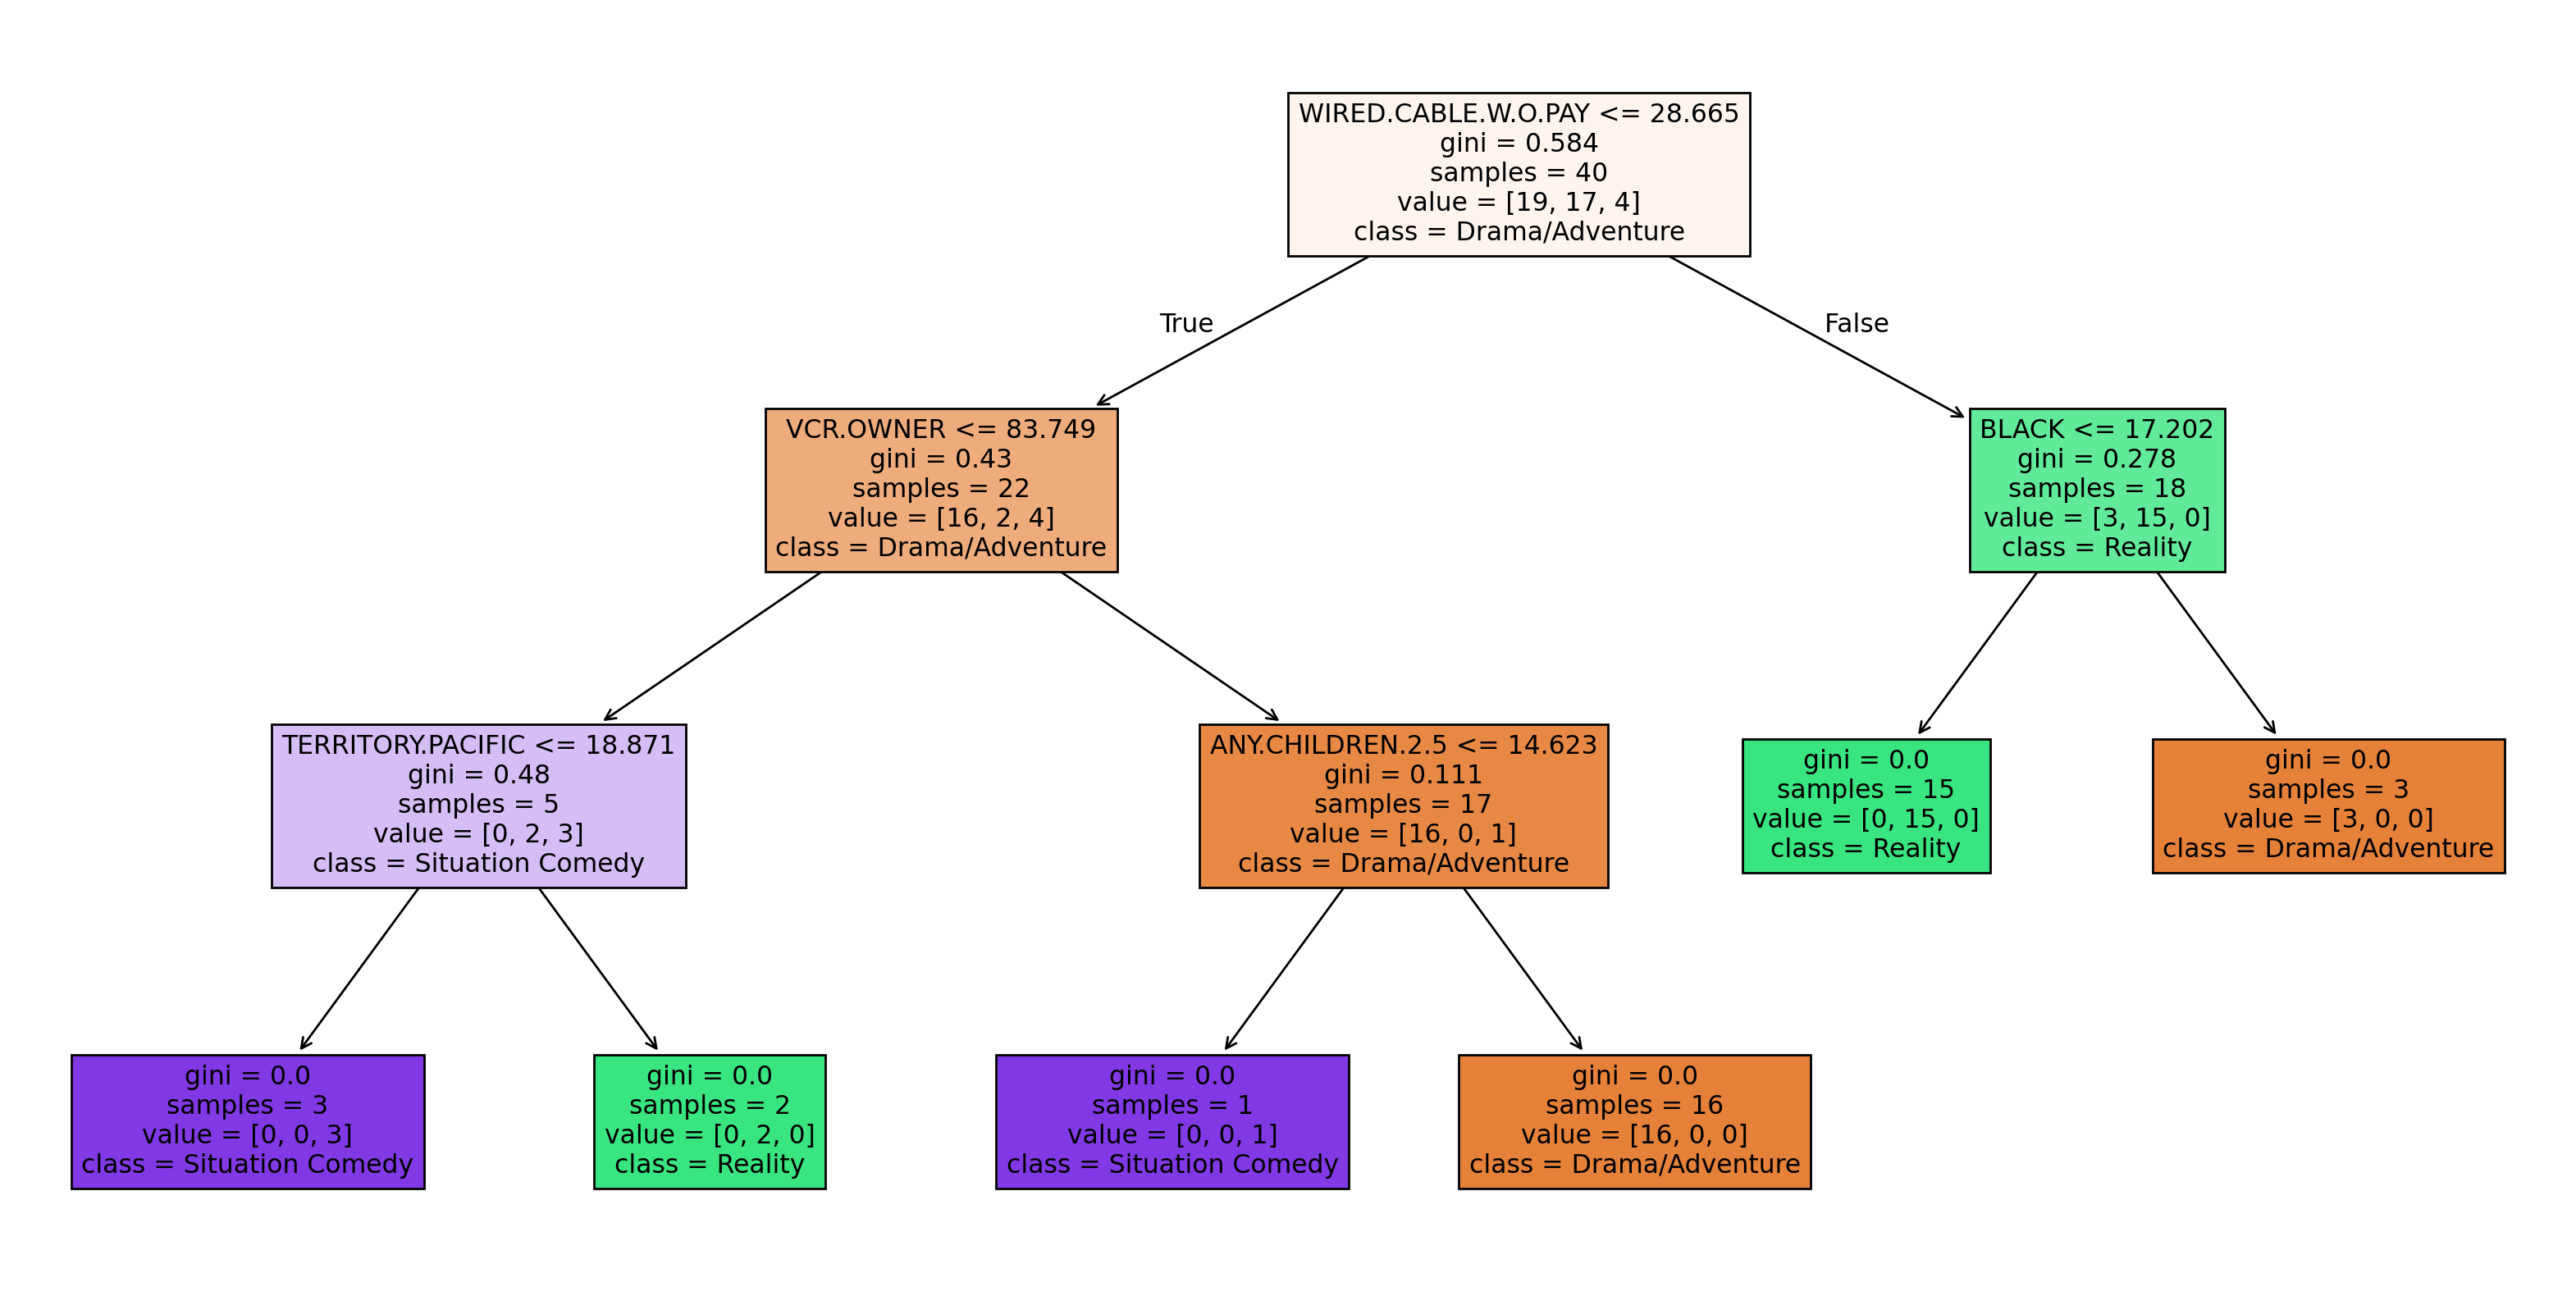

In [7]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

In [8]:
clf.classes_

array(['Drama/Adventure', 'Reality', 'Situation Comedy'], dtype=object)

$Gini=1-\sum\limits_{i=1}^K p_i^2$

In [9]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5)

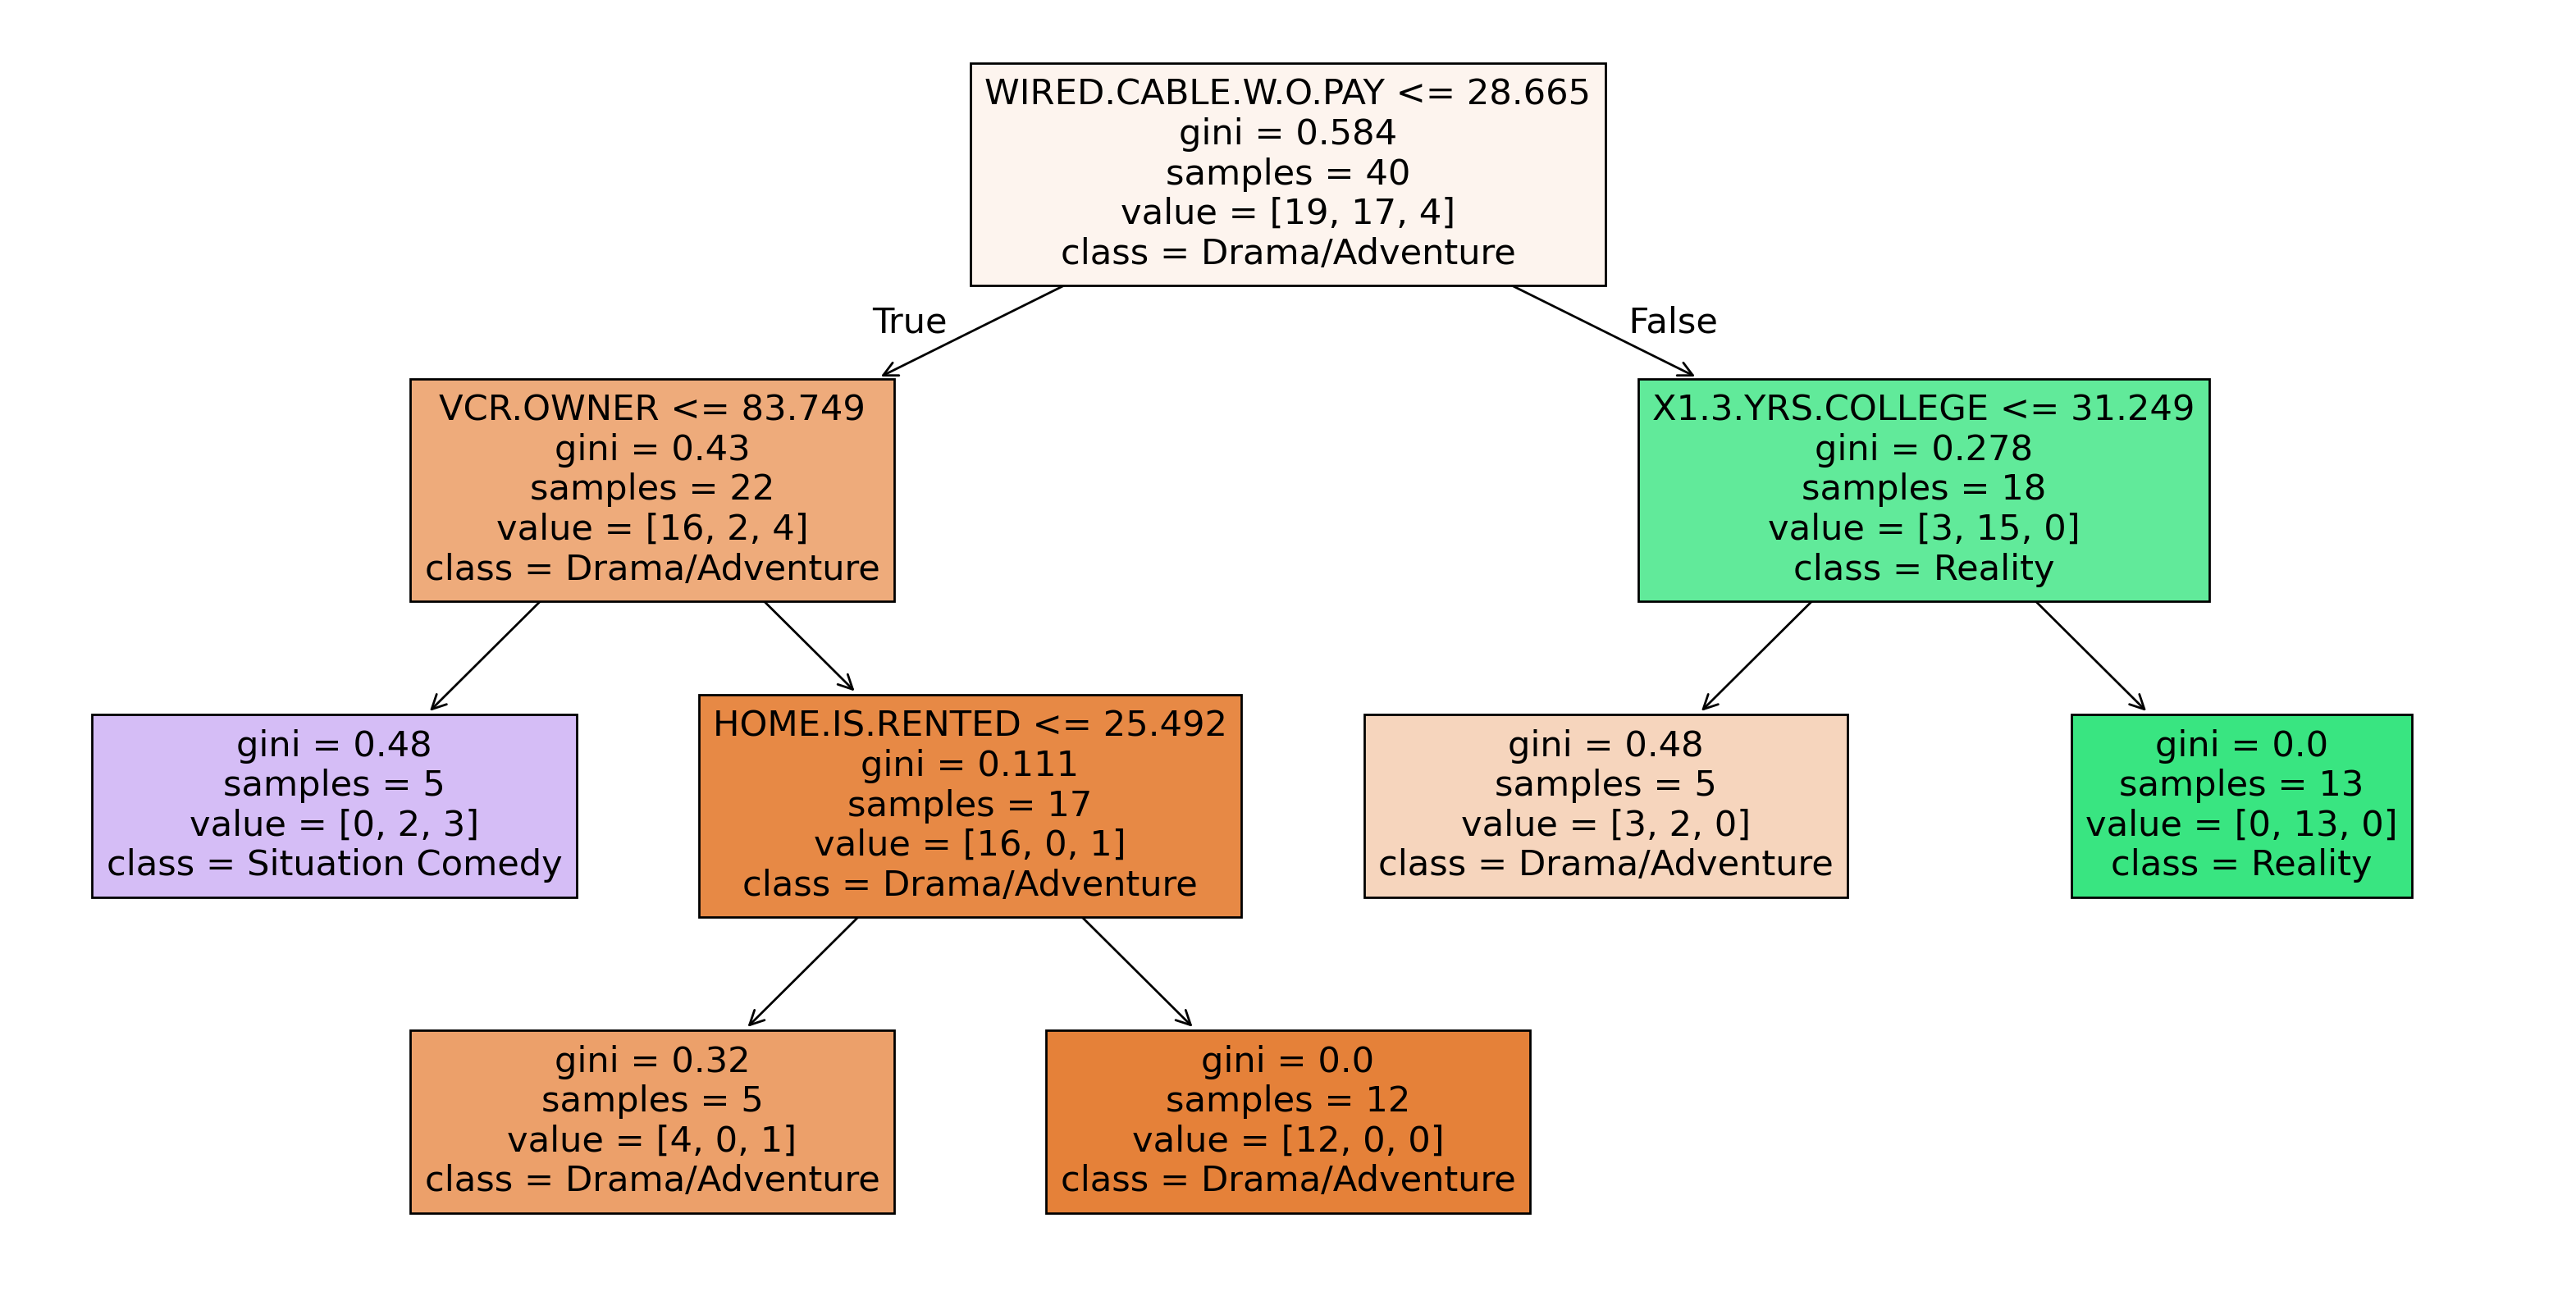

In [10]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

In [11]:
predicted_labels = clf.predict(X)

# Convert predictions to a pandas series or dataframe for easier viewing/manipulation
predicted_series = pd.Series(predicted_labels)

In [12]:
results = pd.DataFrame({'Actual': y, 'Predicted': predicted_labels})
results.head()

Actual        Predicted
0          Reality          Reality
1  Drama/Adventure  Drama/Adventure
2          Reality          Reality
3          Reality  Drama/Adventure
4          Reality          Reality

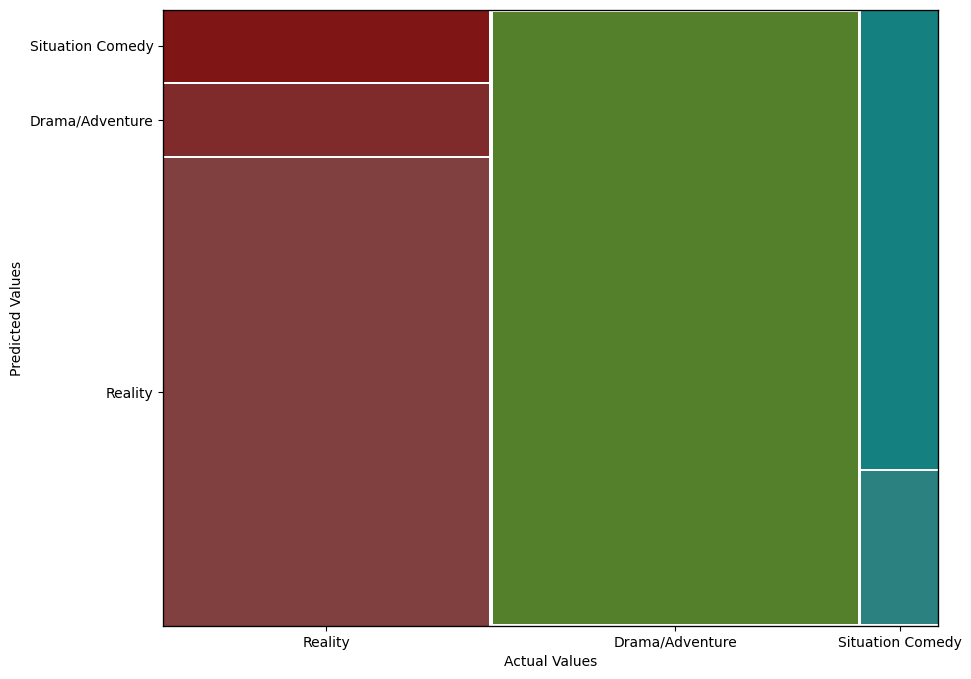

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(results, ['Actual', 'Predicted'], ax=ax, labelizer=lambda k: "")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()

## Model Projected Engagement (PE)

In [14]:
y, X = patsy.dmatrices('PE ~ Genre + GRP - 1', data=nbc, return_type='dataframe') # type: ignore

In [15]:
X.head()

Genre[Drama/Adventure]  Genre[Reality]  Genre[Situation Comedy]    GRP
0                     0.0             1.0                      0.0  151.0
1                     1.0             0.0                      0.0  375.5
2                     0.0             1.0                      0.0  808.5
3                     0.0             1.0                      0.0   17.3
4                     0.0             1.0                      0.0   44.1

In [16]:
X.columns = ['drama', 'reality', 'comedy', 'GRP']
X.head()

drama  reality  comedy    GRP
0    0.0      1.0     0.0  151.0
1    1.0      0.0     0.0  375.5
2    0.0      1.0     0.0  808.5
3    0.0      1.0     0.0   17.3
4    0.0      1.0     0.0   44.1

In [17]:
y.head()

PE
0  54.0000
1  64.6479
2  78.5980
3  62.5703
4  56.0000

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   drama    40 non-null     float64
 1   reality  40 non-null     float64
 2   comedy   40 non-null     float64
 3   GRP      40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [19]:
regtree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
regtree.fit(X, y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

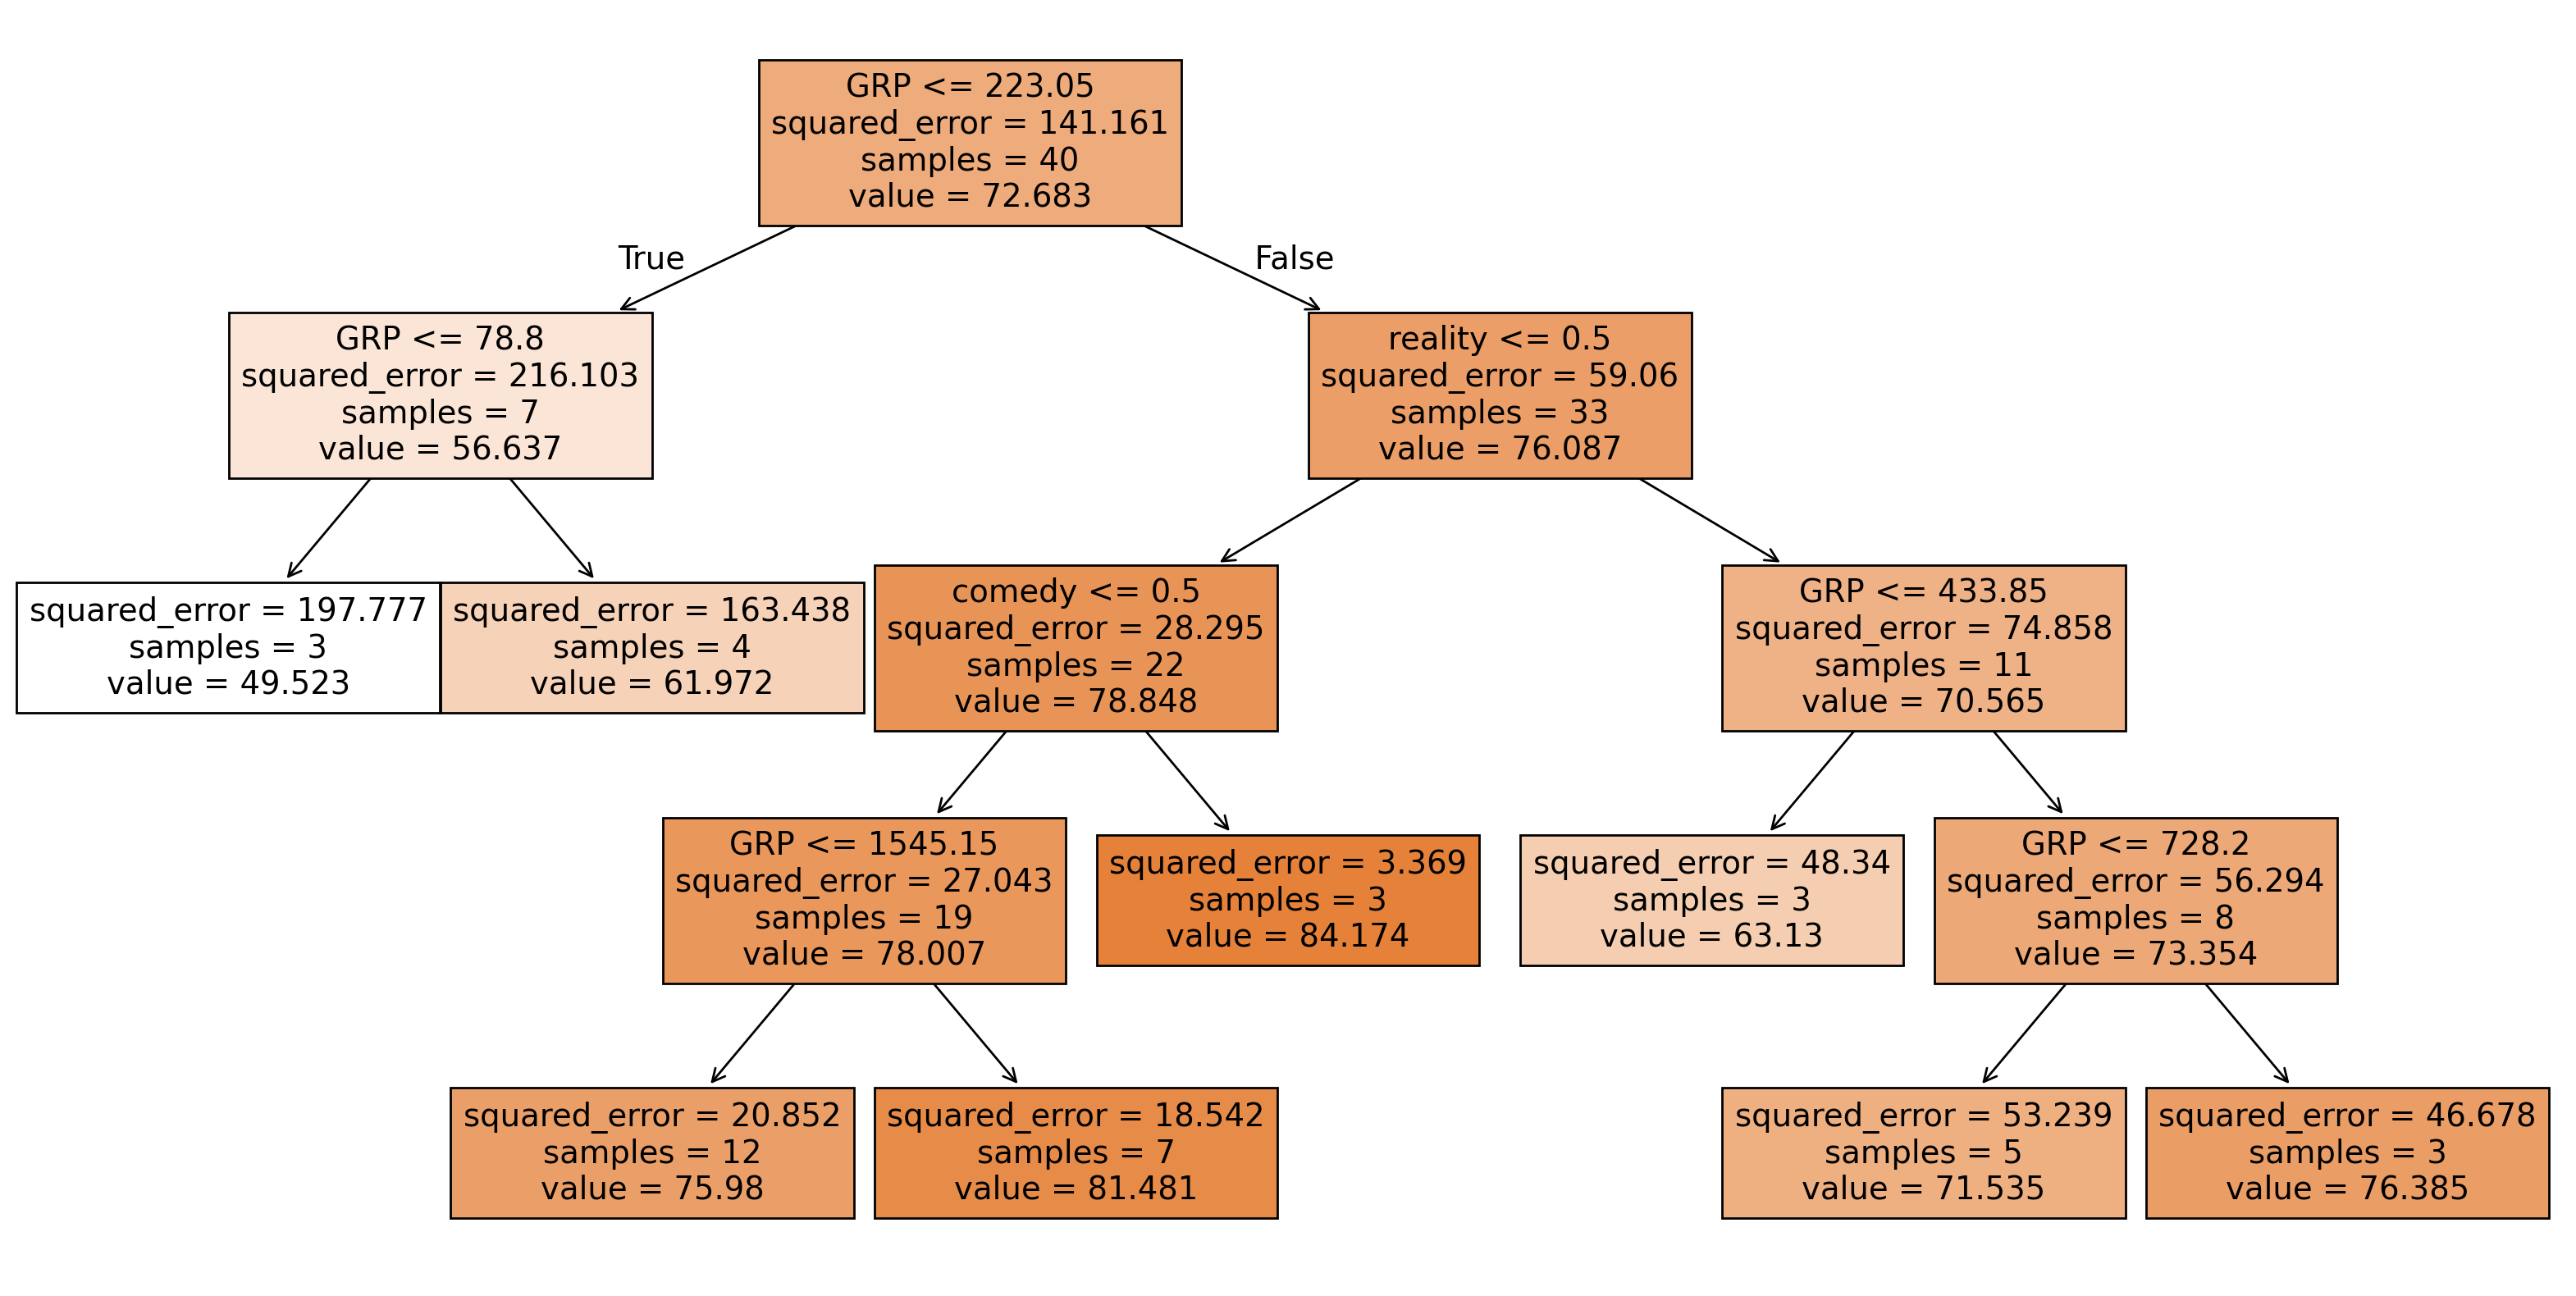

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(regtree, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

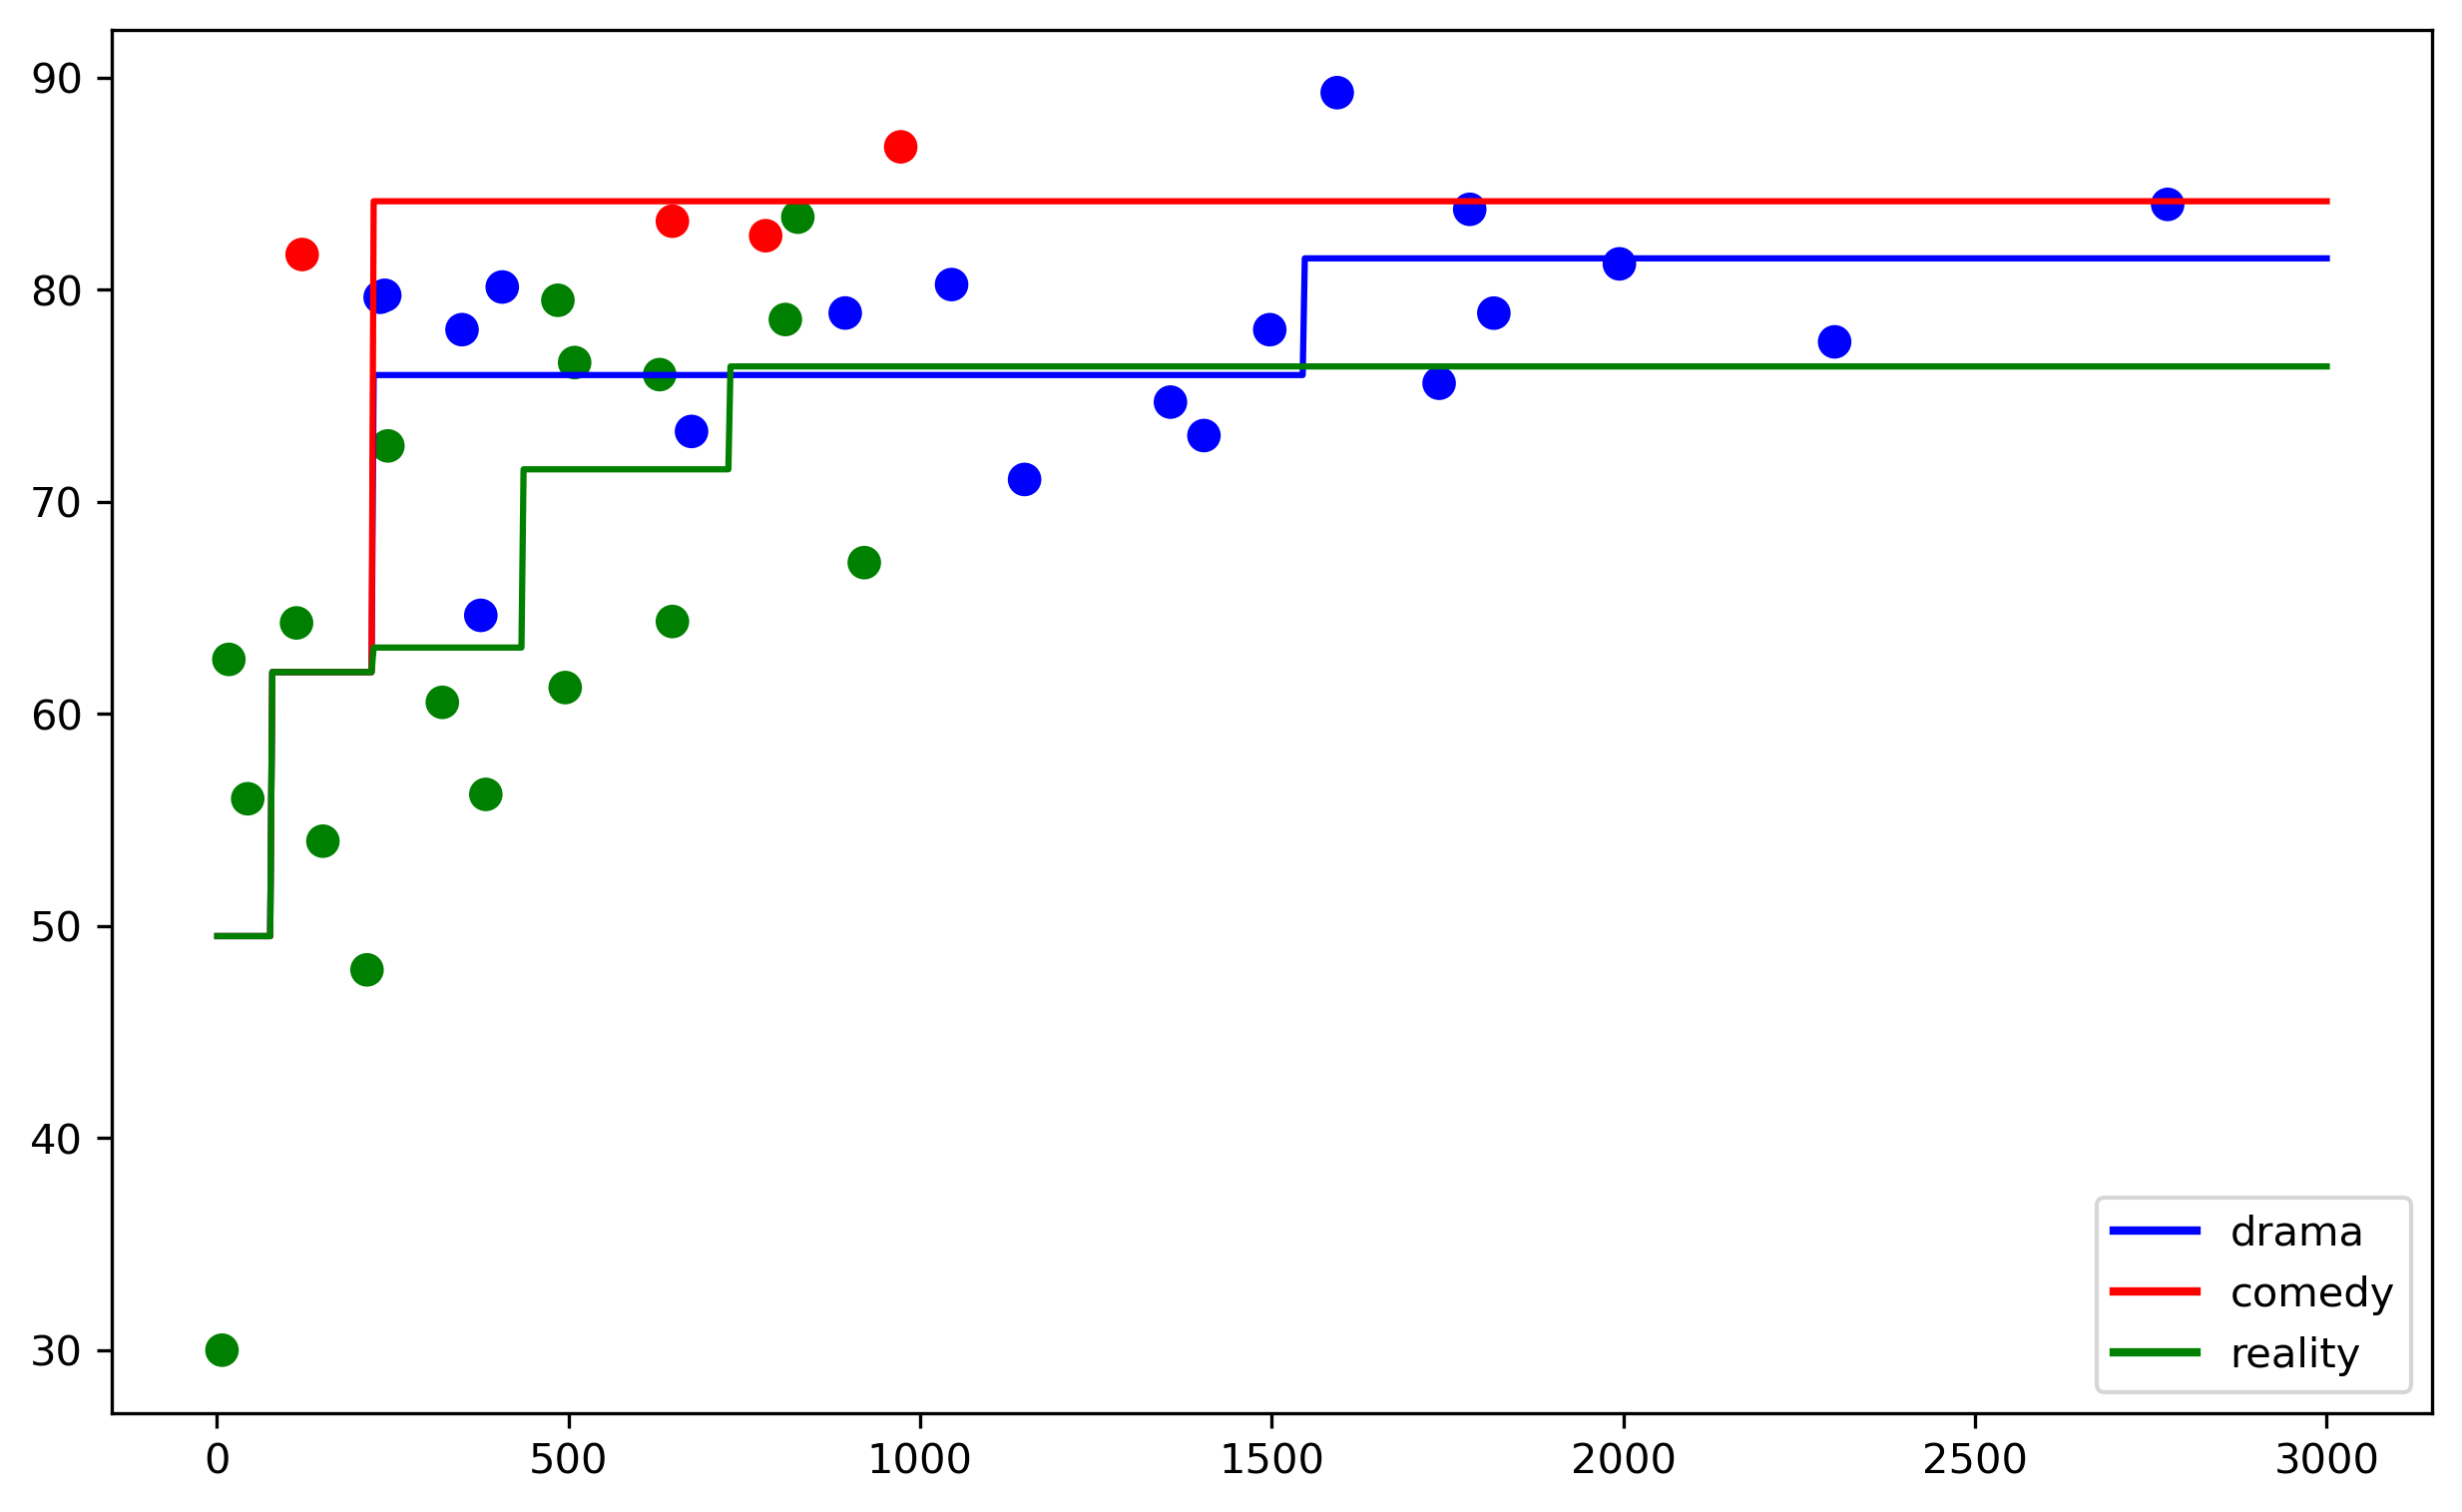

In [21]:
plt.figure(figsize=(10, 6), dpi=300)
colors = {'Drama/Adventure': 'blue', 'Situation Comedy': 'red', 'Reality': 'green'}
plt.scatter(nbc['GRP'], nbc['PE'], c=nbc['Genre'].map(colors), s=50, marker='o')

newgrp = np.linspace(1, 3000, 1000)
predicted_drama = regtree.predict(pd.DataFrame({'drama': 1, 'reality': 0, 'comedy': 0, 'GRP': newgrp}))
predicted_comedy = regtree.predict(pd.DataFrame({'drama': 0, 'reality': 0, 'comedy': 1, 'GRP': newgrp}))
predicted_reality = regtree.predict(pd.DataFrame({'drama': 0, 'reality': 1, 'comedy': 0, 'GRP': newgrp}))

plt.plot(newgrp, predicted_drama, color='blue')
plt.plot(newgrp, predicted_comedy, color='red')
plt.plot(newgrp, predicted_reality, color='green')

legend_labels = [plt.Line2D([0], [0], color='blue', lw=2), # type: ignore
                 plt.Line2D([0], [0], color='red', lw=2), # type: ignore
                 plt.Line2D([0], [0], color='green', lw=2)] # type: ignore
plt.legend(legend_labels, ['drama', 'comedy', 'reality'], loc='lower right')


$\color{red}{Question}$ Try the default setting of the tree and show the predictions as above.

$\color{red}{Question}$ Try different depths of the tree and show the predictions as above.

## Pruning
You must grow a tree first to understand the penalty term. This step is **application-dependent**.

- Strat from closest to *leaves* (most unimportant)
- End with the *root*
- Each *ccp_alpha* is the cut-off value such that we are indifferent between pruning or not.
- $R_\alpha(T) = R(T)+\alpha T$
- $\alpha$ works as a penalty term.

We got some new data on cancer biopsies. It's pretty small but we'll run with it. The variables are:
* lcavol: log(cancer volume), the response of interest
* age: age
* lbph: log(benign prostatic hyperplasia amount)
* lcp: log(capsular penetration)
* gleason: [Gleason score](https://www.pcf.org/about-prostate-cancer/diagnosis-staging-prostate-cancer/gleason-score-isup-grade/)
* lpsa: log(prostate specific antigen)

- $n = 97$

In [22]:
prostate = pd.read_csv("https://www.dropbox.com/s/cj0m2cat6bqx3xp/prostate.csv?dl=1")
prostate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   age      97 non-null     int64  
 2   lbph     97 non-null     float64
 3   lcp      97 non-null     float64
 4   gleason  97 non-null     int64  
 5   lpsa     97 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.7 KB


In [23]:
y, X = patsy.dmatrices('lcavol ~ -1+age+lbph+lcp+gleason+lpsa', data=prostate, return_type='dataframe') # type: ignore

In [25]:
regtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
regtree.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

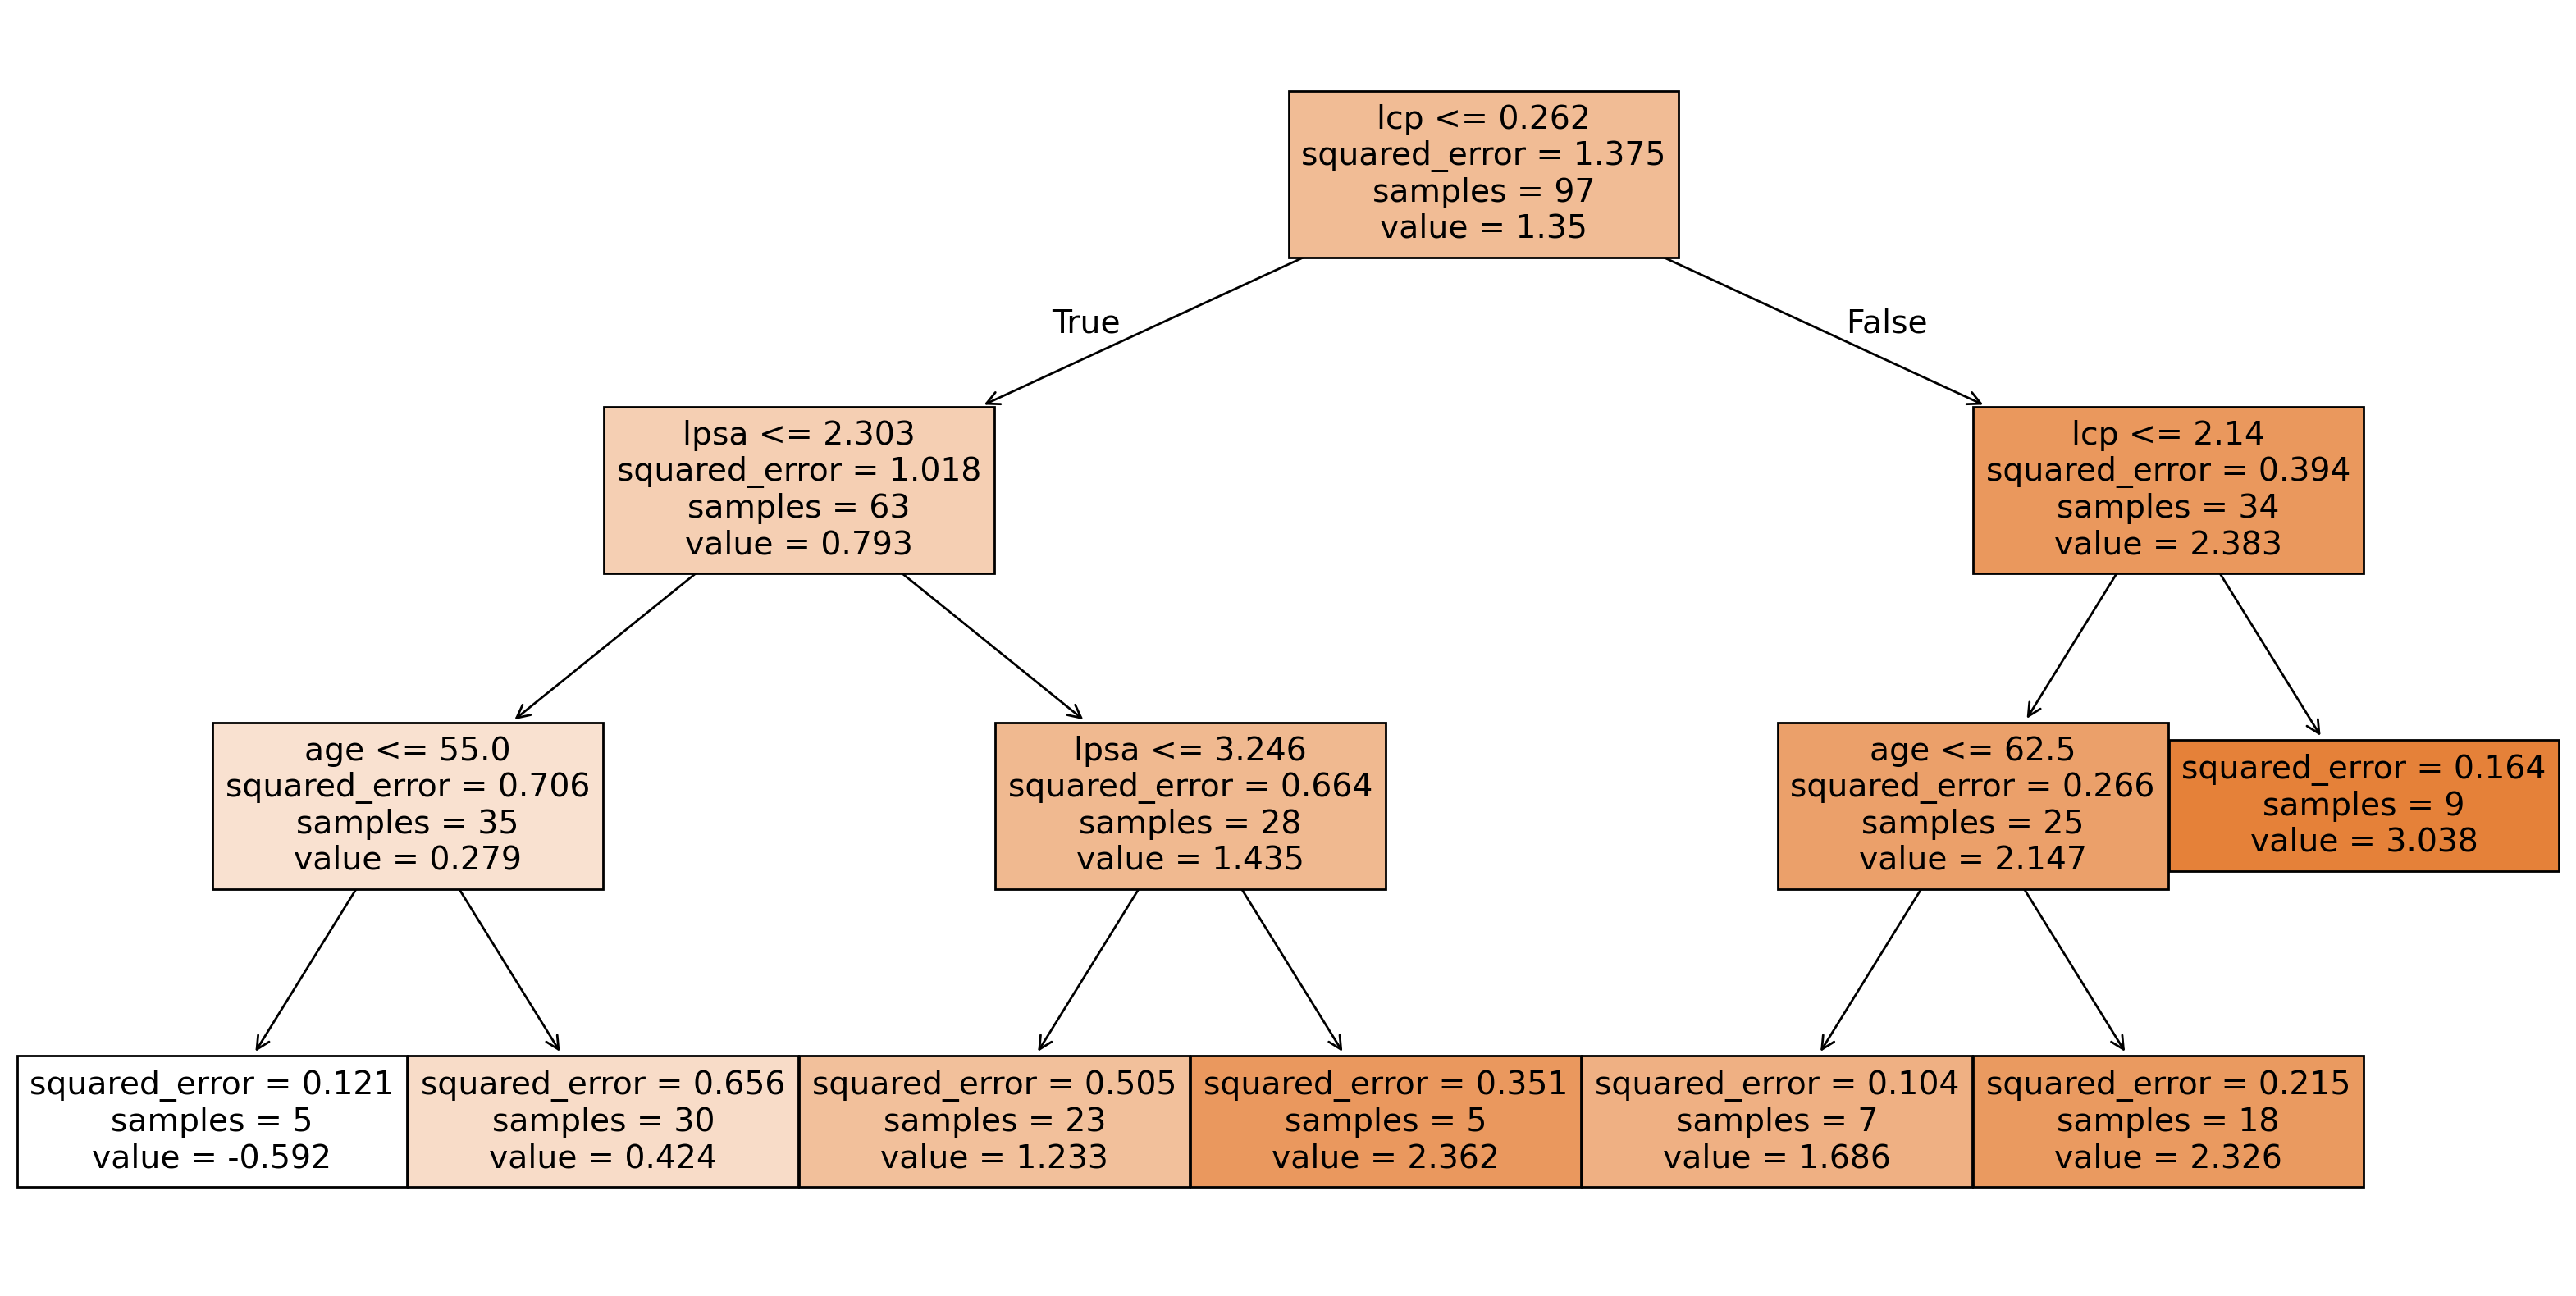

In [26]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(regtree, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

In [27]:
path = regtree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

In [28]:
ccp_alphas

array([0.        , 0.02131174, 0.04555382, 0.05392023, 0.05413705,
       0.21437333, 0.57585191])

Text(0, 0.5, 'Total Impurity of Leaves')

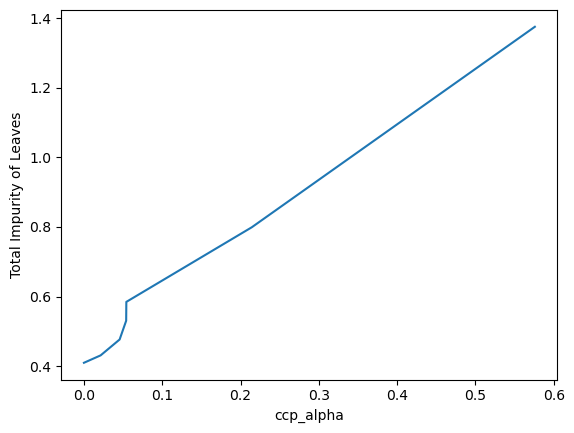

In [29]:
alphas = path.ccp_alphas
impurities = path.impurities

plt.figure()
plt.plot(alphas, impurities)
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")


In [30]:
scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    score = np.mean(cross_val_score(tree, X, y, cv=cv))  # Using 5-fold CV
    scores.append(score)

In [31]:
best_alpha = ccp_alphas[np.argmax(scores)]
best_alpha

np.float64(0.0455538202825167)

In [32]:
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha)
pruned_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=np.float64(0.0455538202825167))

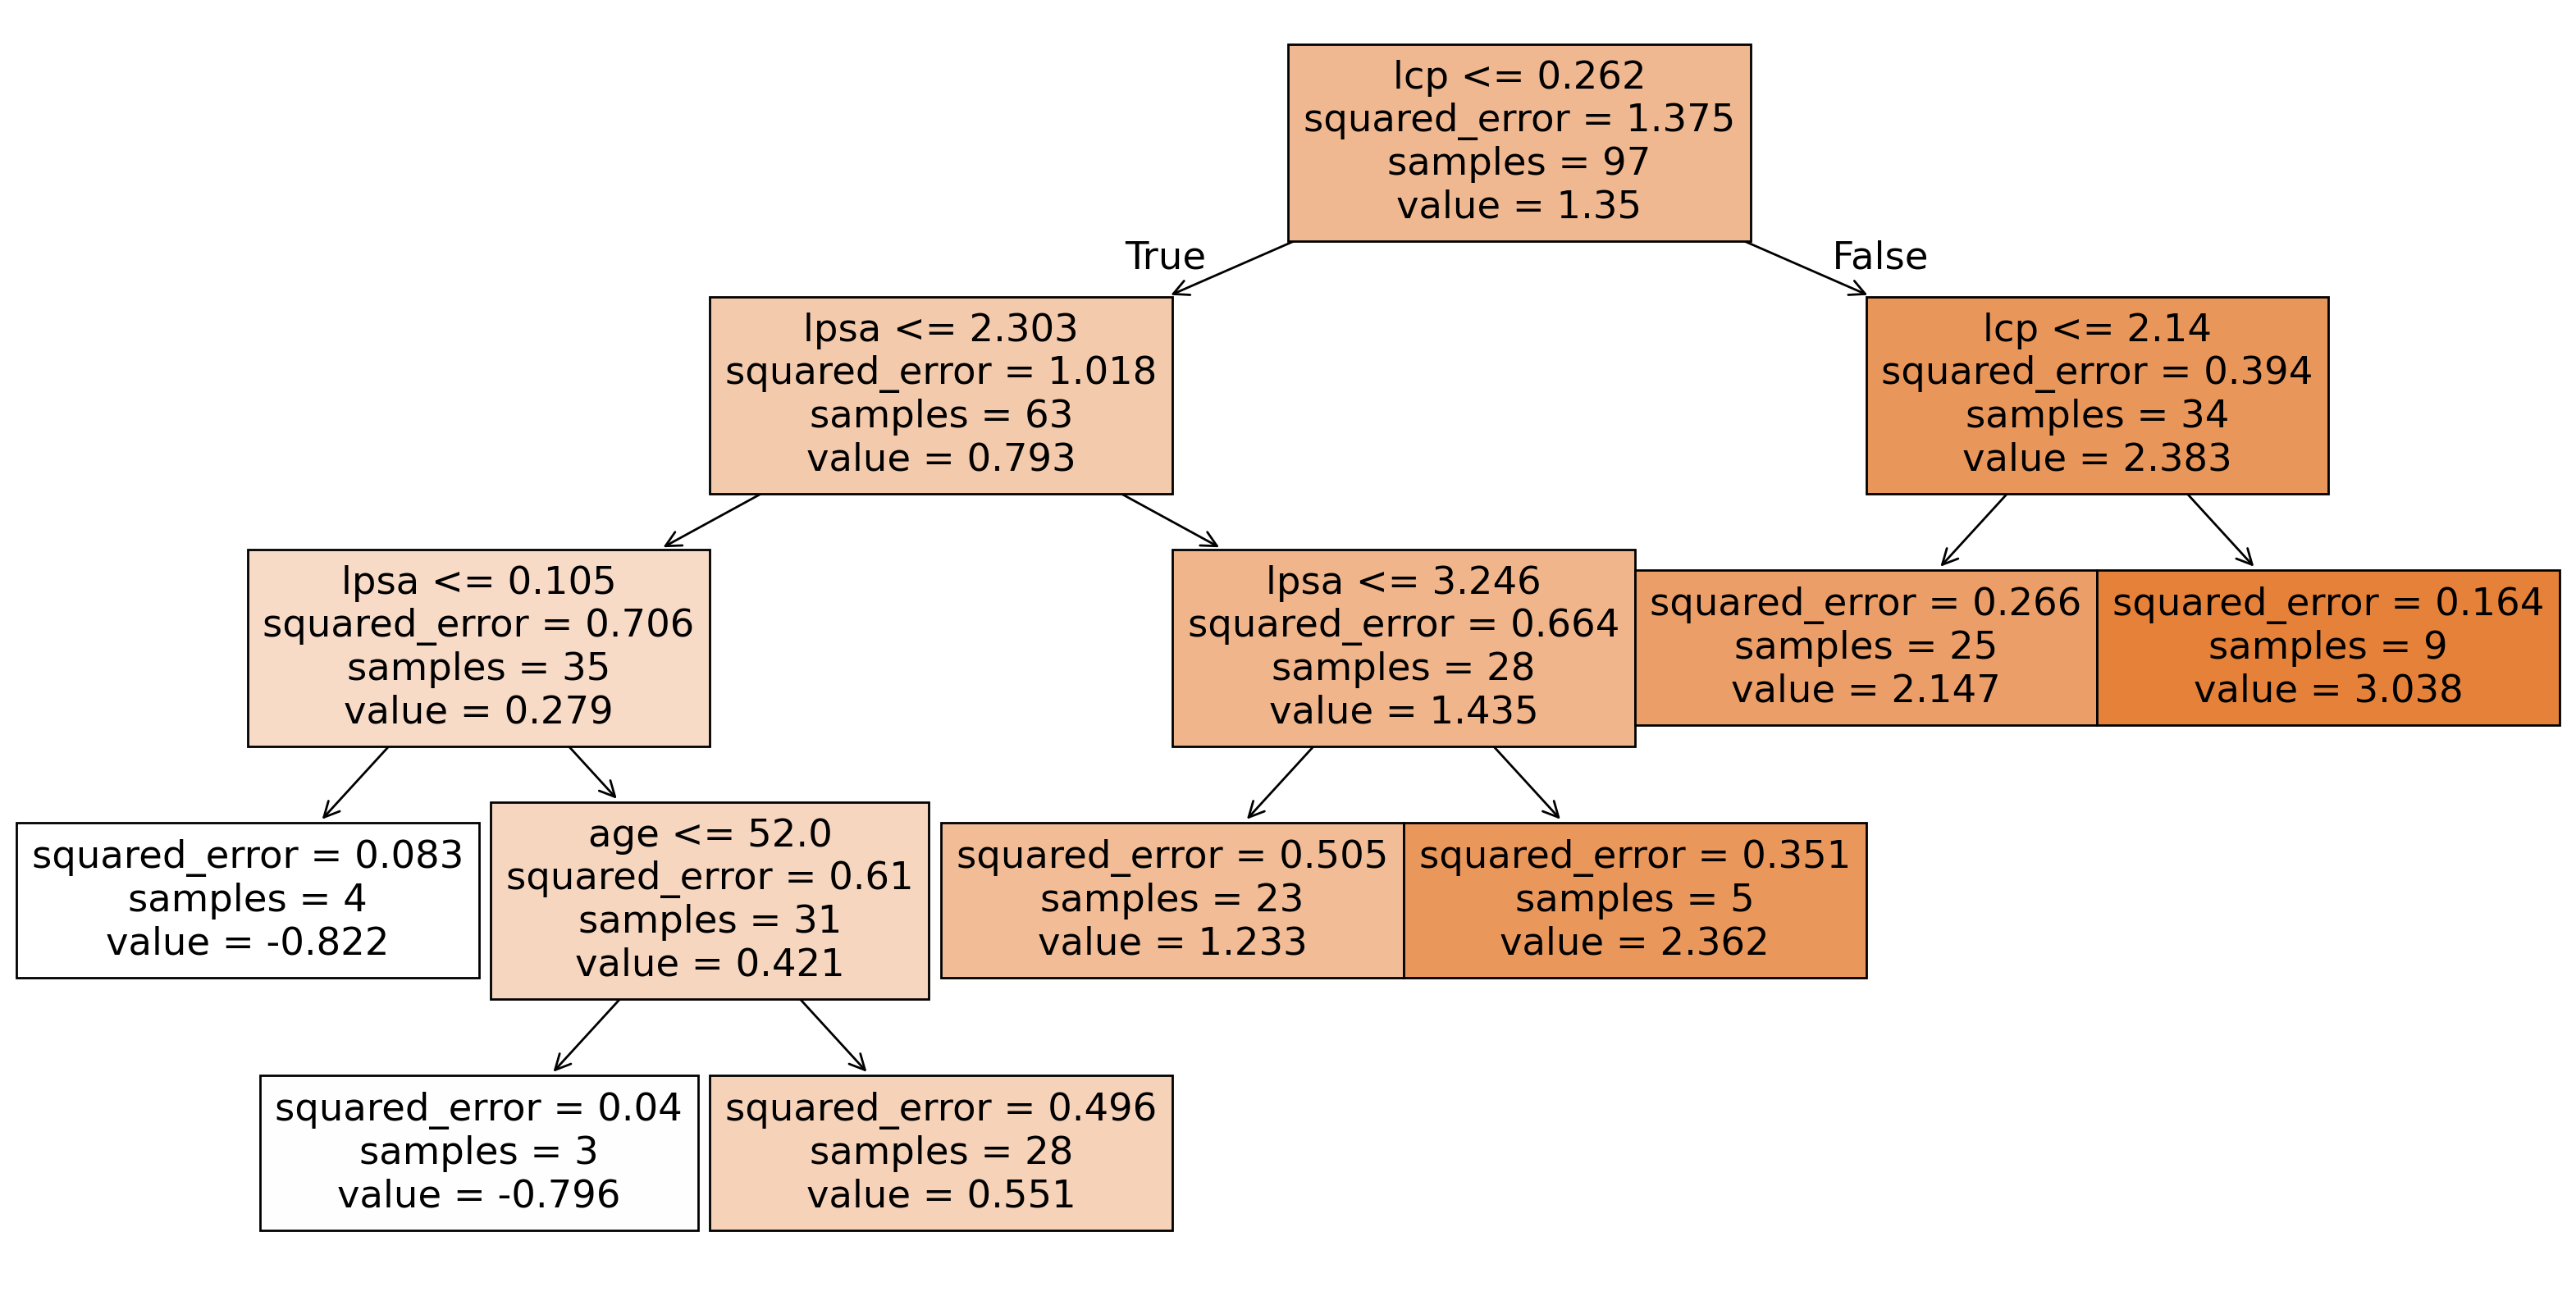

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(pruned_tree, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

In [34]:
# full tree pruning
regtree = DecisionTreeRegressor()
regtree.fit(X, y)
path = regtree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas[:-1]

tree_sizes = []
oos_losses = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(X, y)

    # Size of the tree (number of leaves)
    size = np.sum(tree.tree_.children_left==-1) # type: ignore
    tree_sizes.append(size)

    # OOS loss using cross-validation
    score = -np.mean(cross_val_score(tree, X, y, cv=cv, scoring='neg_mean_squared_error'))  # Using 5-fold CV and mean squared error as the loss
    oos_losses.append(score)

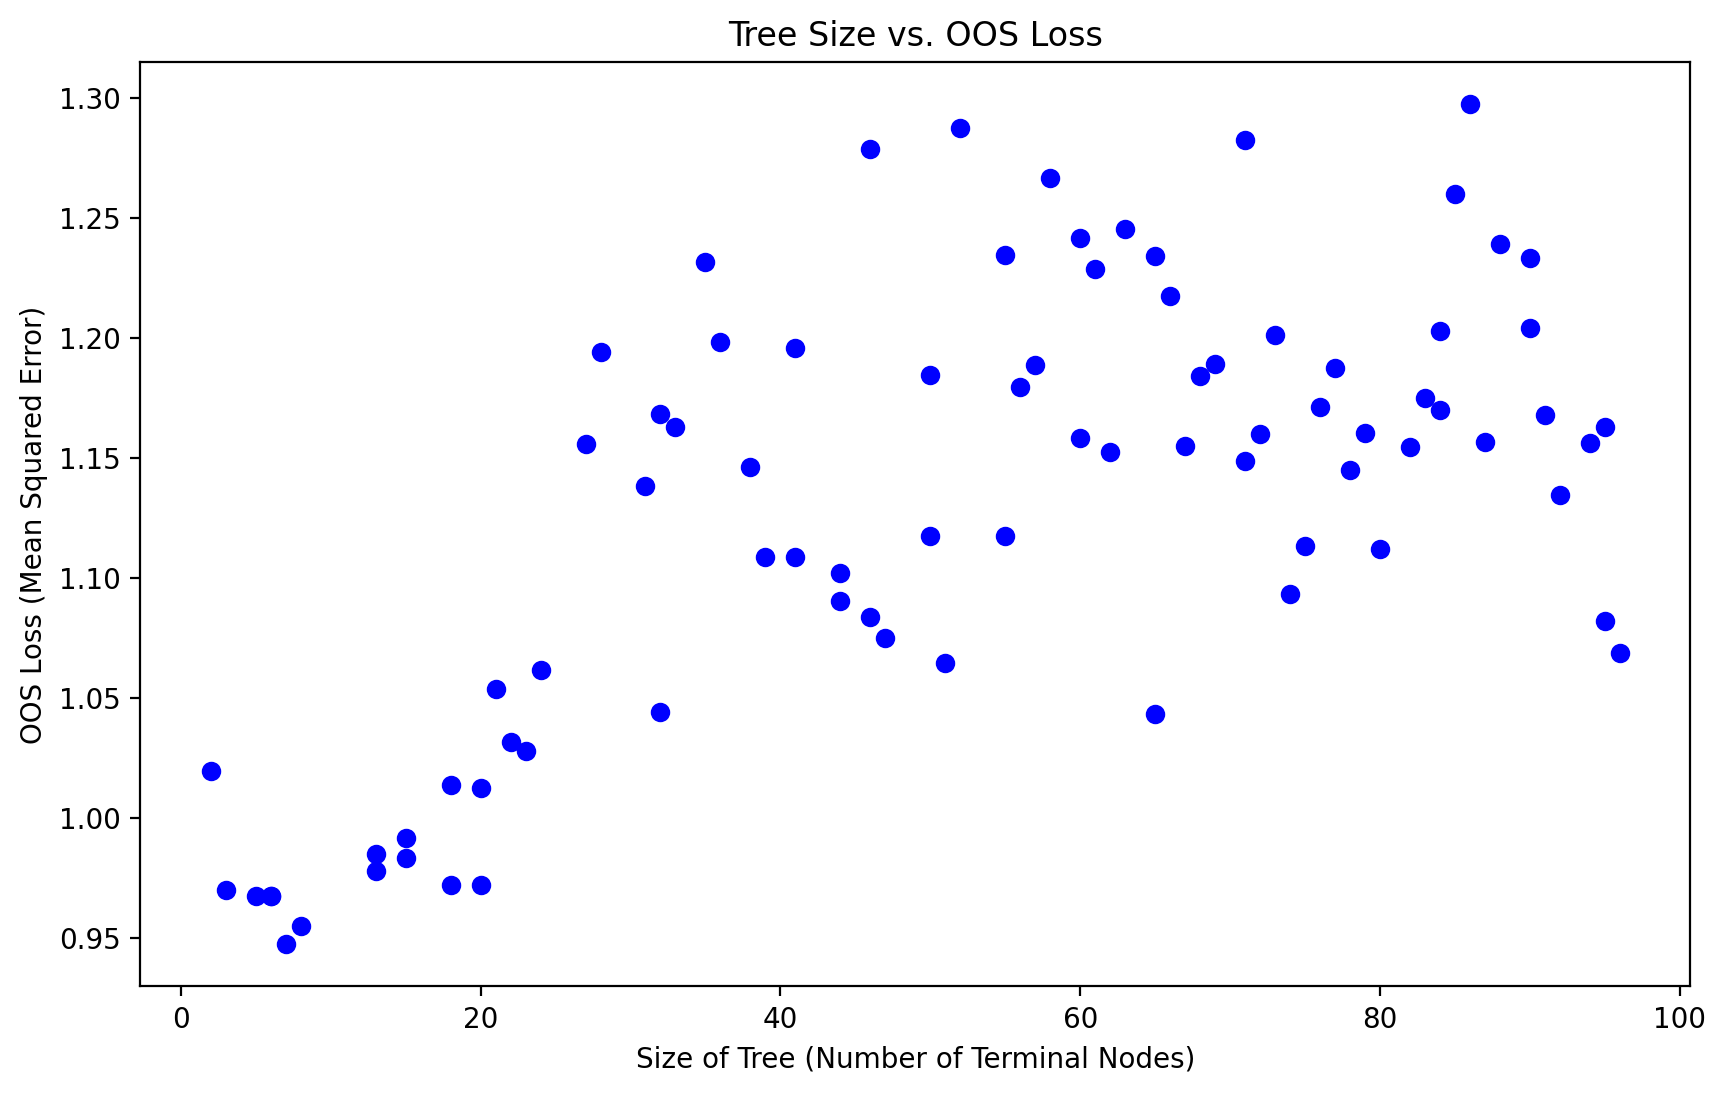

In [35]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(tree_sizes, oos_losses, color='blue')
plt.xlabel('Size of Tree (Number of Terminal Nodes)')
plt.ylabel('OOS Loss (Mean Squared Error)')
plt.title('Tree Size vs. OOS Loss')
plt.show()

In [36]:
tree_sizes[np.argmin(oos_losses)]

np.int64(7)

In [37]:
best_alpha = ccp_alphas[np.argmin(oos_losses)]

In [38]:
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha)
pruned_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=np.float64(0.02131174097883906))

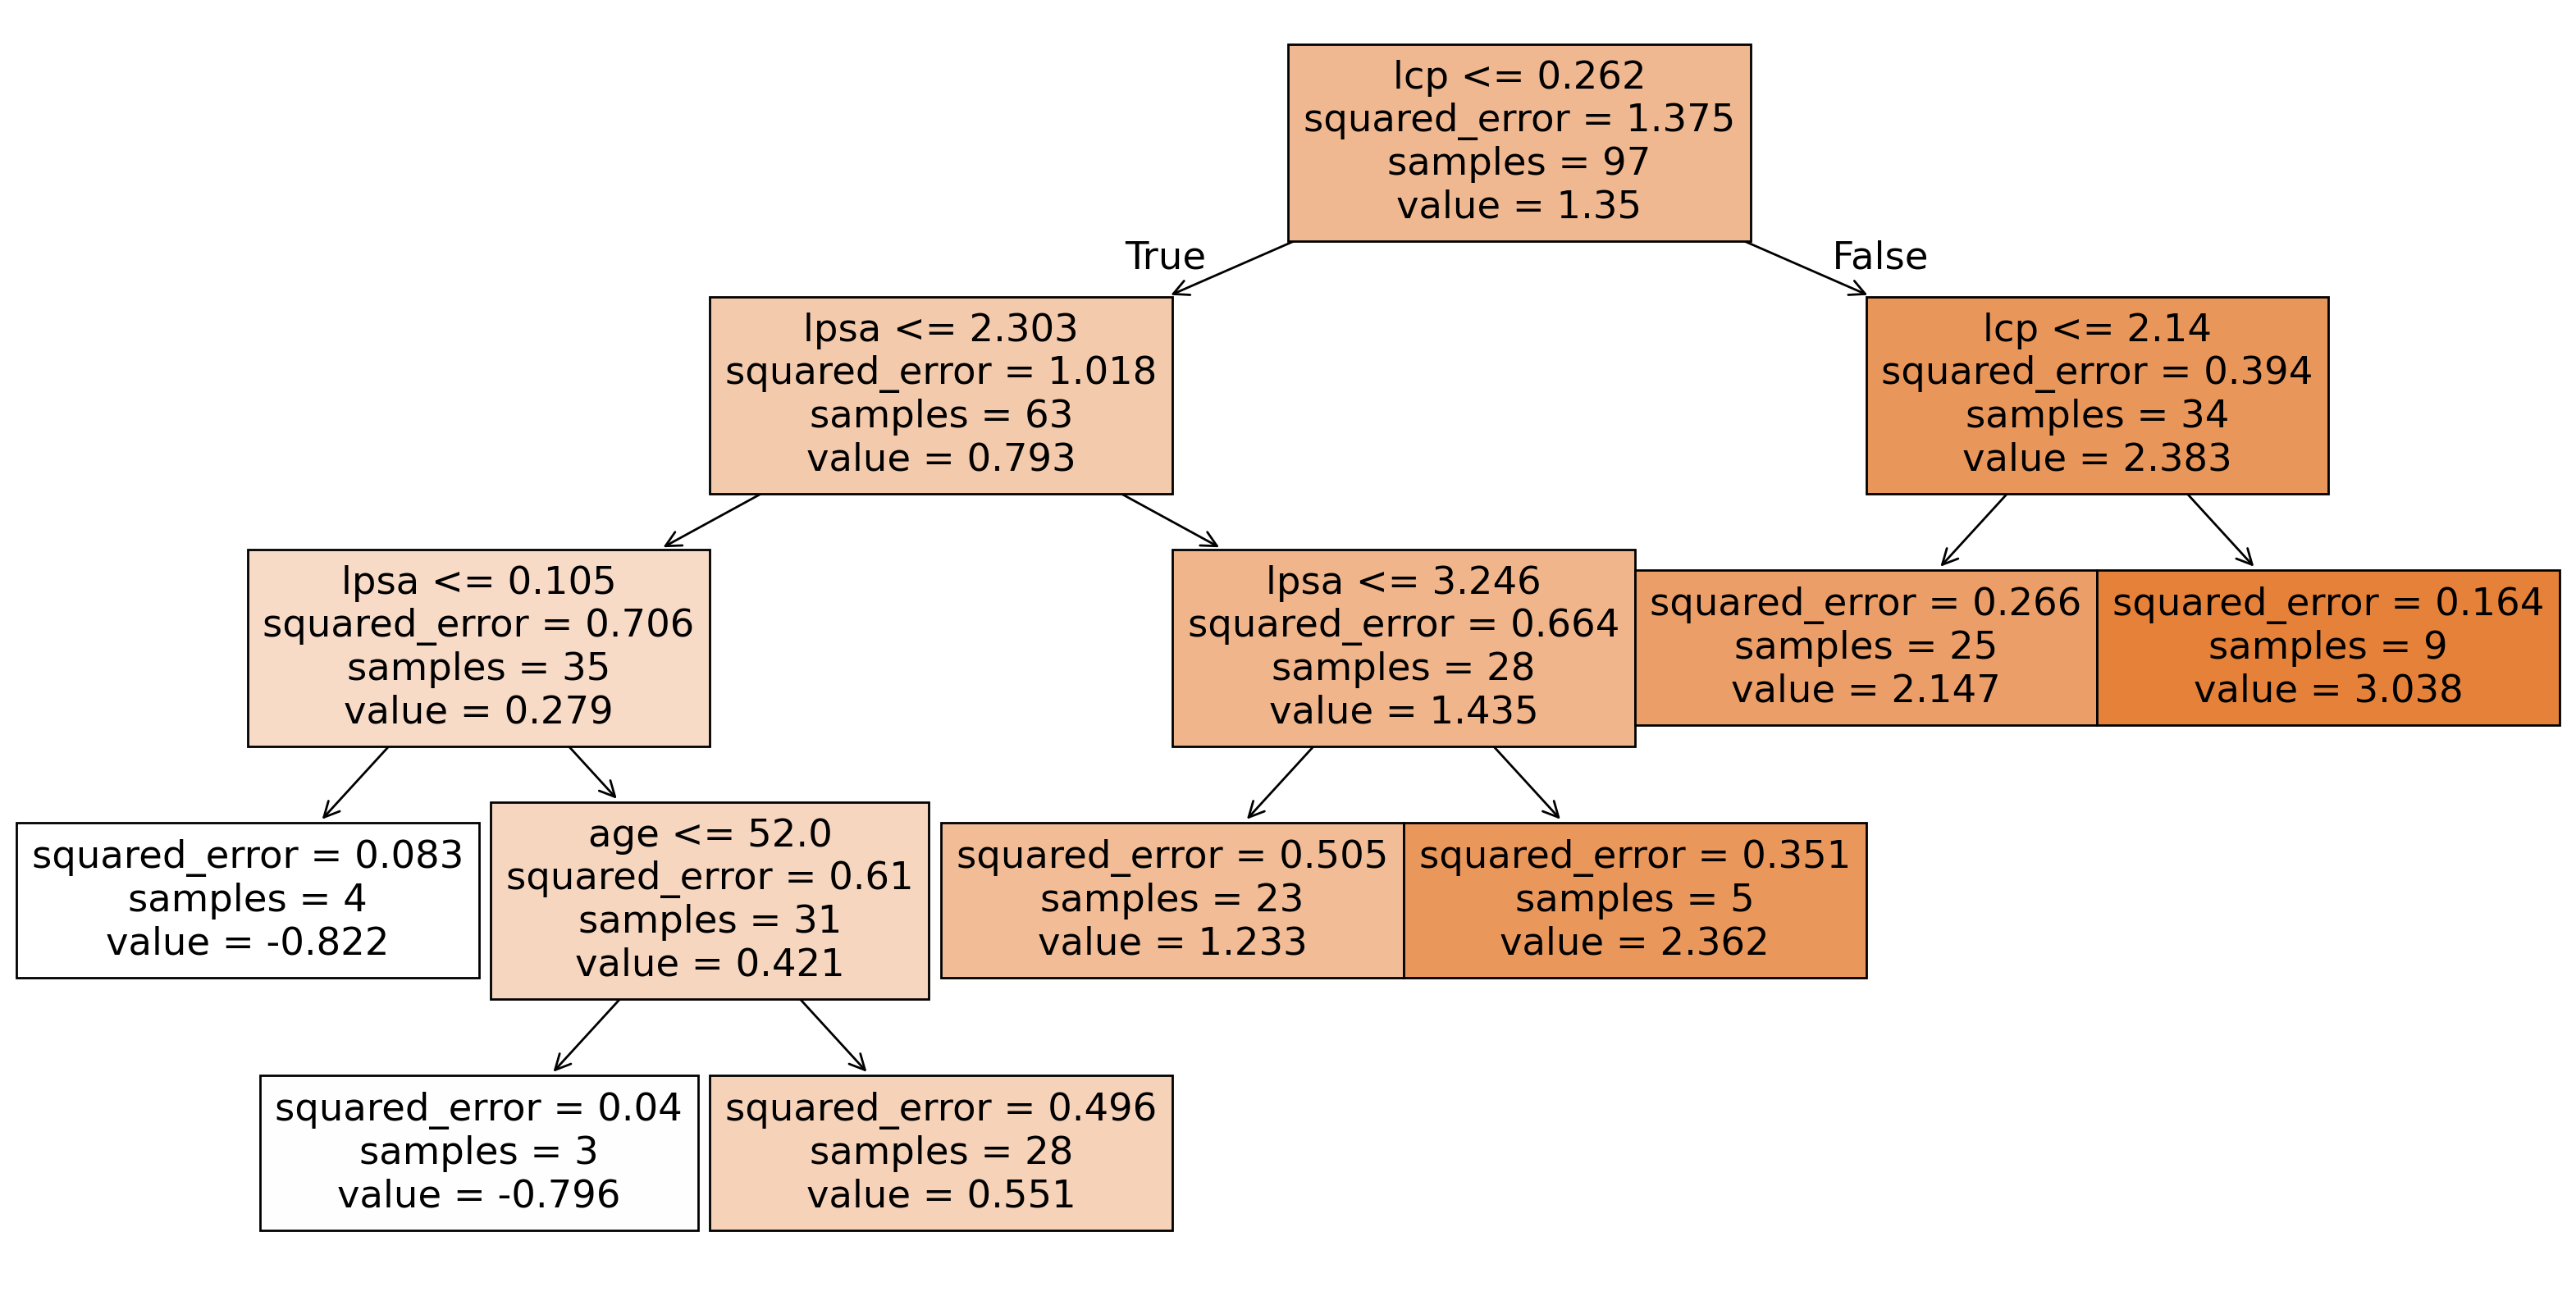

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(pruned_tree, feature_names=X.columns, class_names=clf.classes_, filled=True) # type: ignore
plt.show()

## SHAP value

[SHapley Additive exPlanations](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)

- based on cooperative game theory
- Theoretically driven statistics
- [Illustrative Theory Video](https://www.youtube.com/watch?v=UJeu29wq7d0)

In [40]:
explainer = shap.TreeExplainer(pruned_tree)

In [41]:
shap_values = explainer(X)

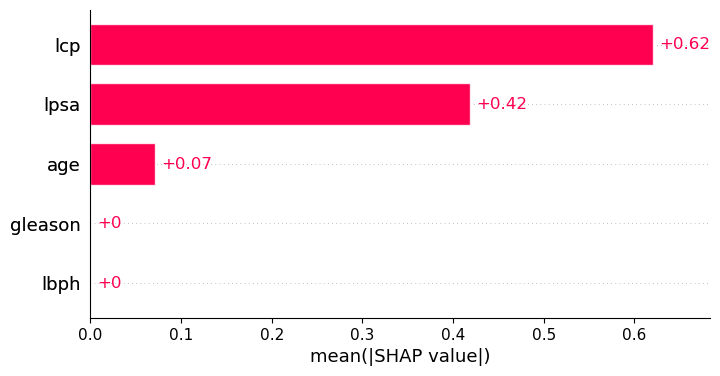

In [42]:
shap.plots.bar(shap_values)

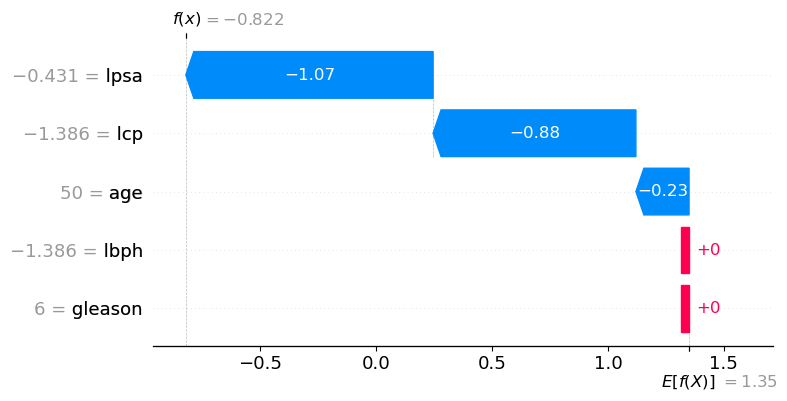

In [44]:
# look at one obsevation
shap.plots.waterfall(shap_values[0])

# Random Forest (RF)

- A tree can be unstable. A subtle difference in the node could lead to a significant deviation in the prediction for different trees.
- **bagging**： bootstrap aggregating. It takes care of uncertainty to stabilise the model and hence prediction. It can be interpreted as the Bayesian model averaging (**BMA**)

- **RF** may damage performce when $n$ is large.

**Algorithm 24**
$B$ is the bootstrap size
1. sample with replacement $n$ observations from the data.
1. Fit a CART tree $T_b$ to the sample

For $b=1,...,B$, there are $B$ trees $T_1,...,T_B$. The prediction is simply the sample average of predictions from all trees.

## NBC

In [45]:
nbc = pd.read_csv("https://www.dropbox.com/s/28tqjgnmym6re1s/nbc_showdetails.csv?dl=1")
demos = pd.read_csv("https://www.dropbox.com/s/7k7za30jzqoenmx/nbc_demographics.csv?dl=1")

X = demos.drop(columns=['Show'])
y = nbc['Genre']

In [46]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

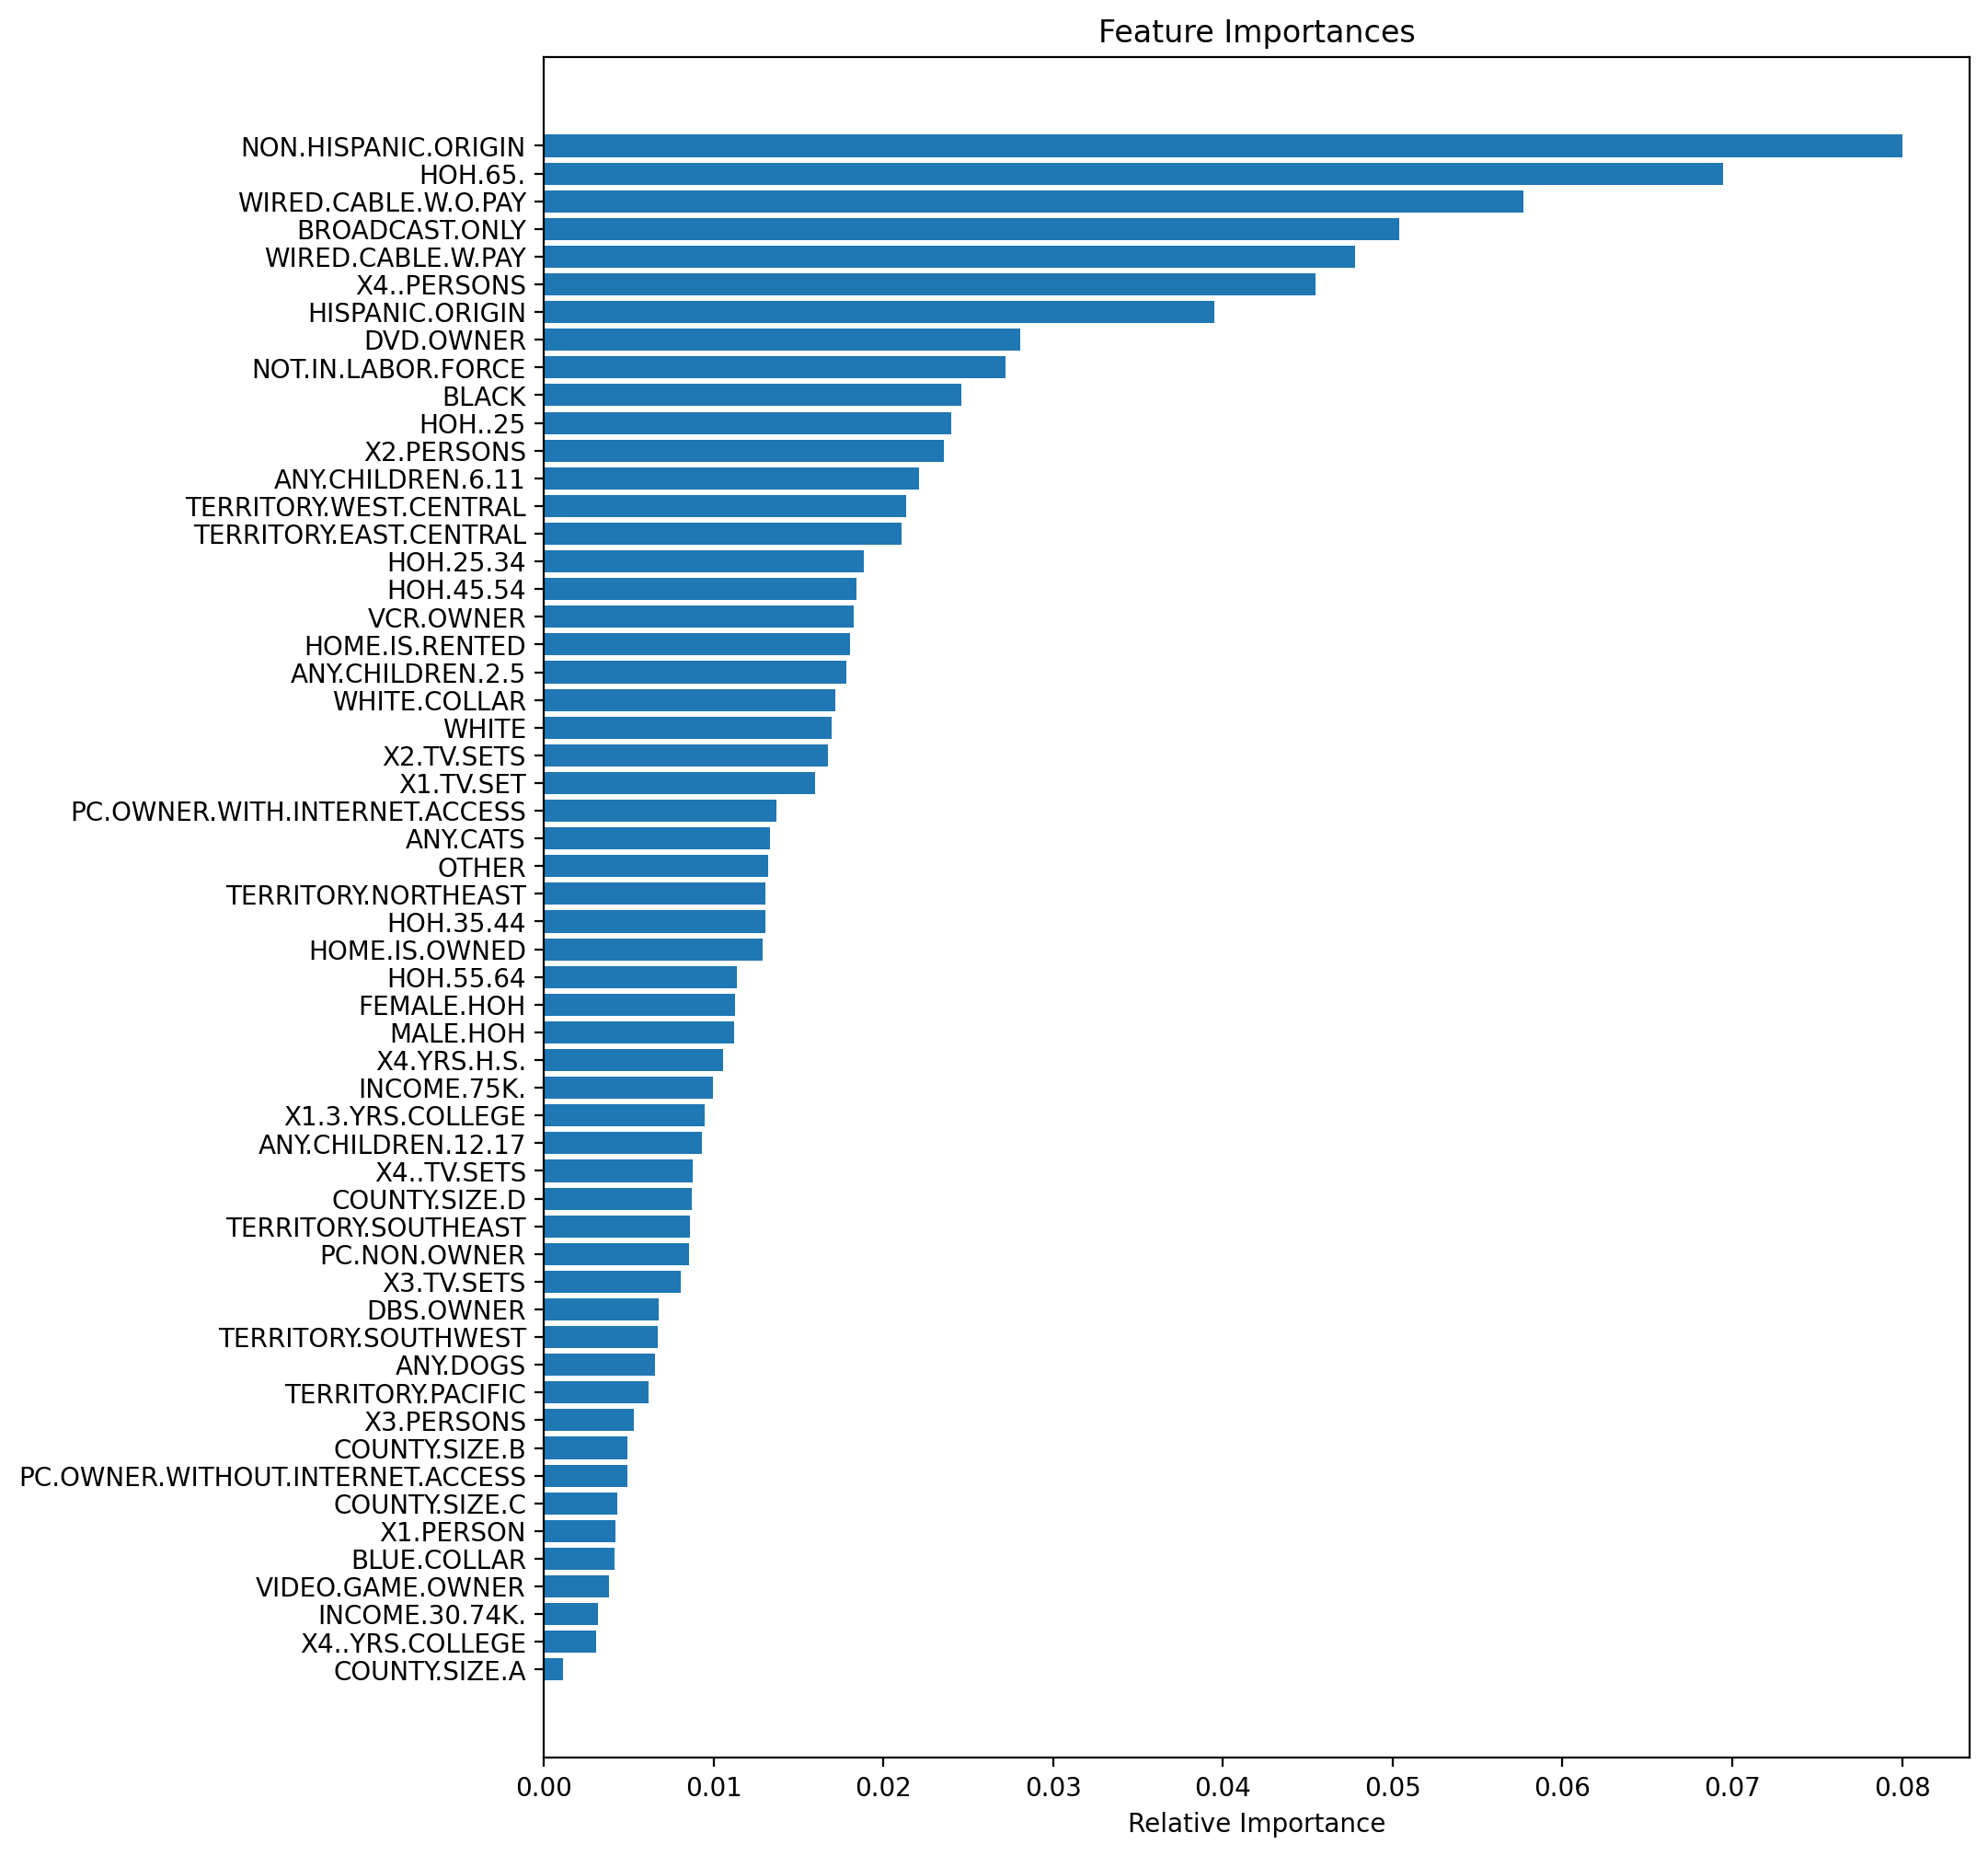

In [47]:
# the normalised total impurity decrease
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12), dpi=200)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

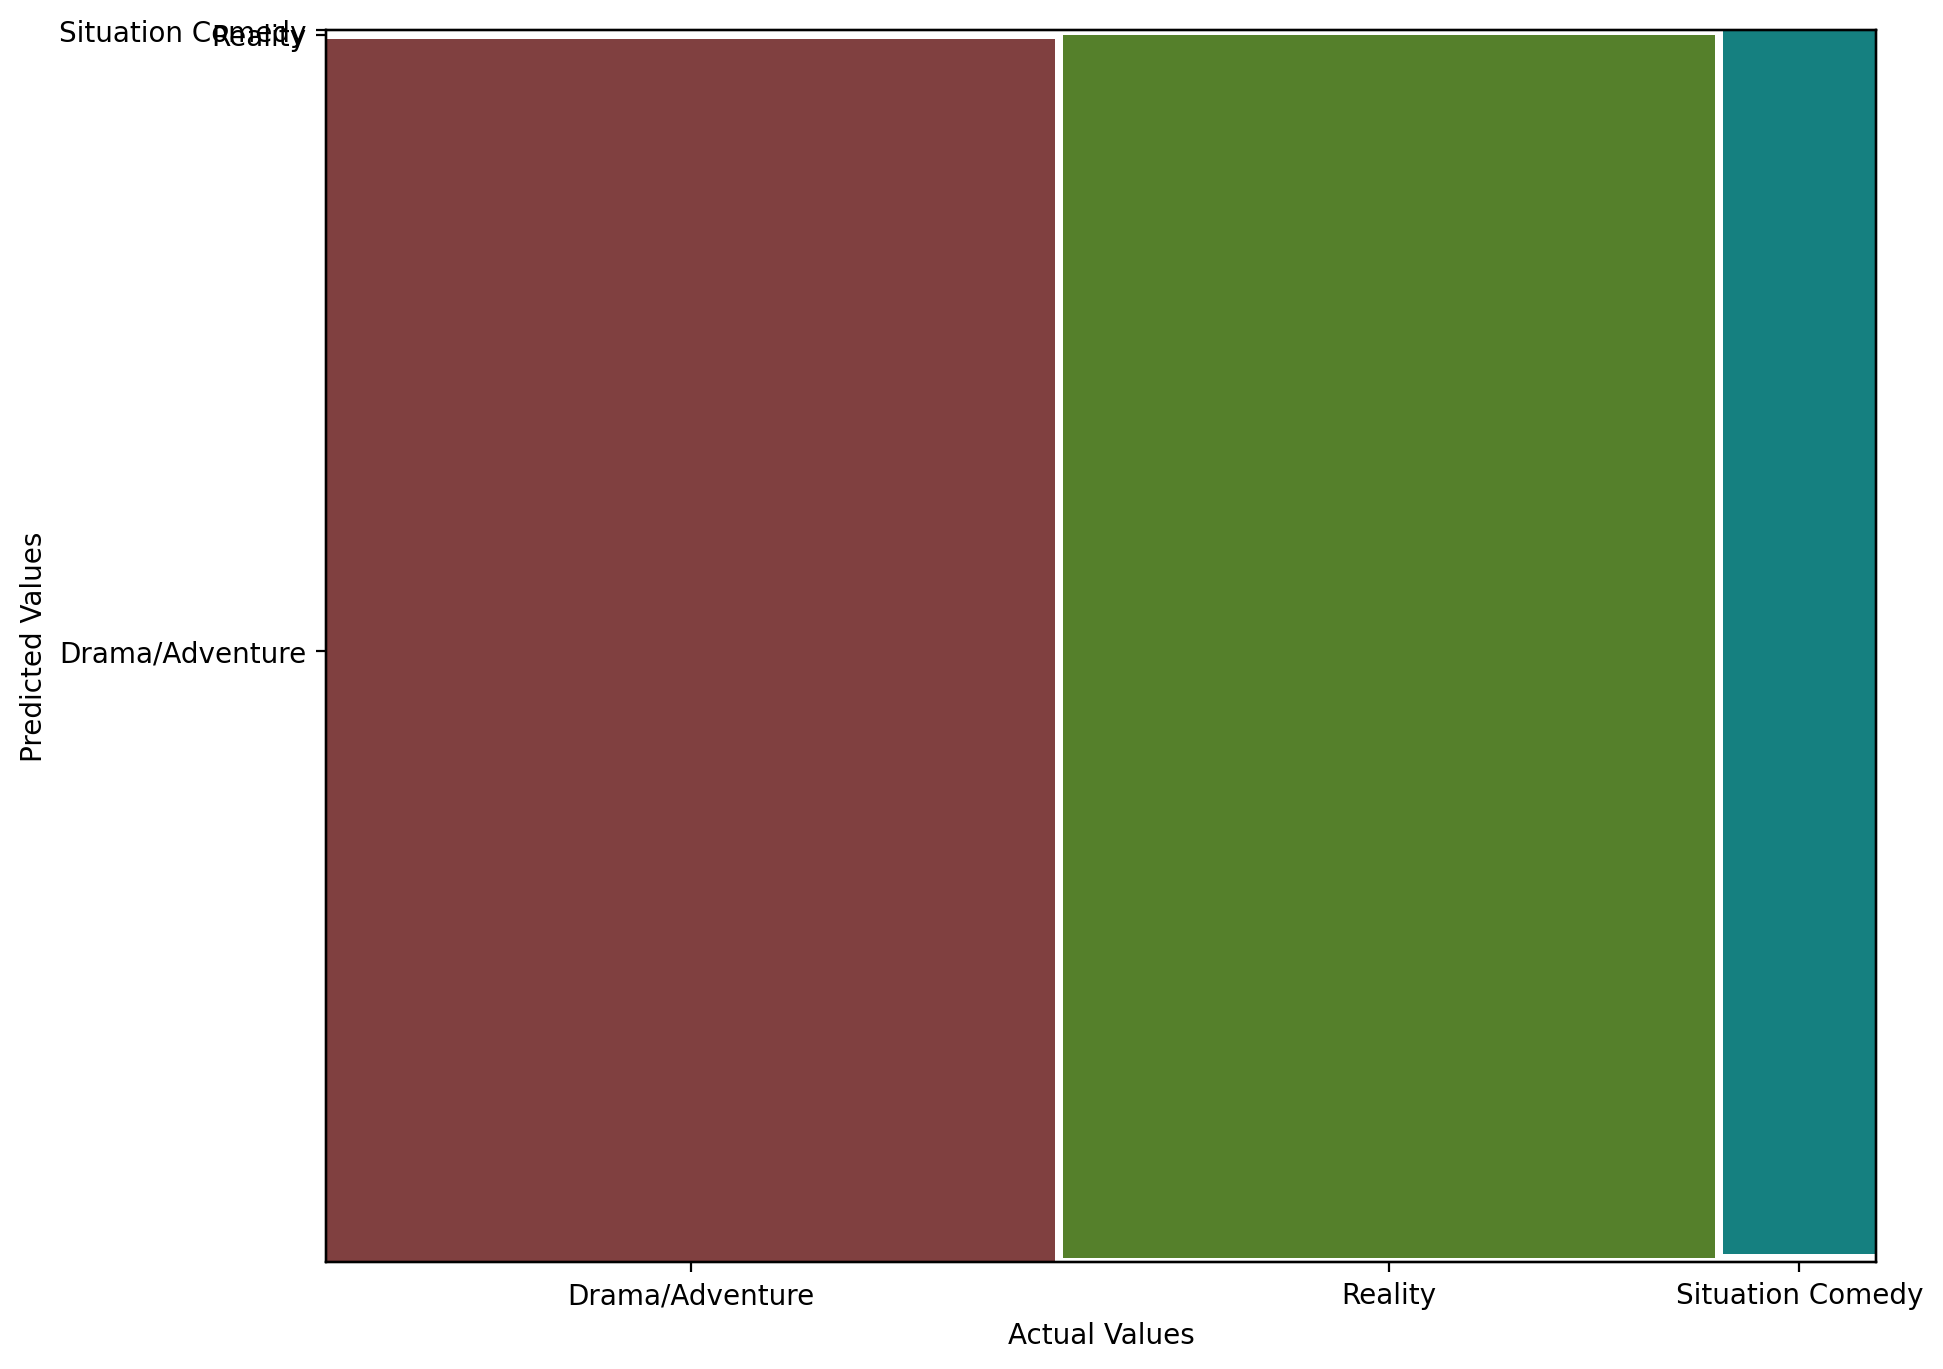

In [49]:
pred_genre = clf.predict(X)

crosstab_data = pd.crosstab(y, pred_genre)

fig, ax = plt.subplots(figsize=(10, 8), dpi=200)
mosaic(crosstab_data.stack(), ax=ax, labelizer=lambda k: "")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()

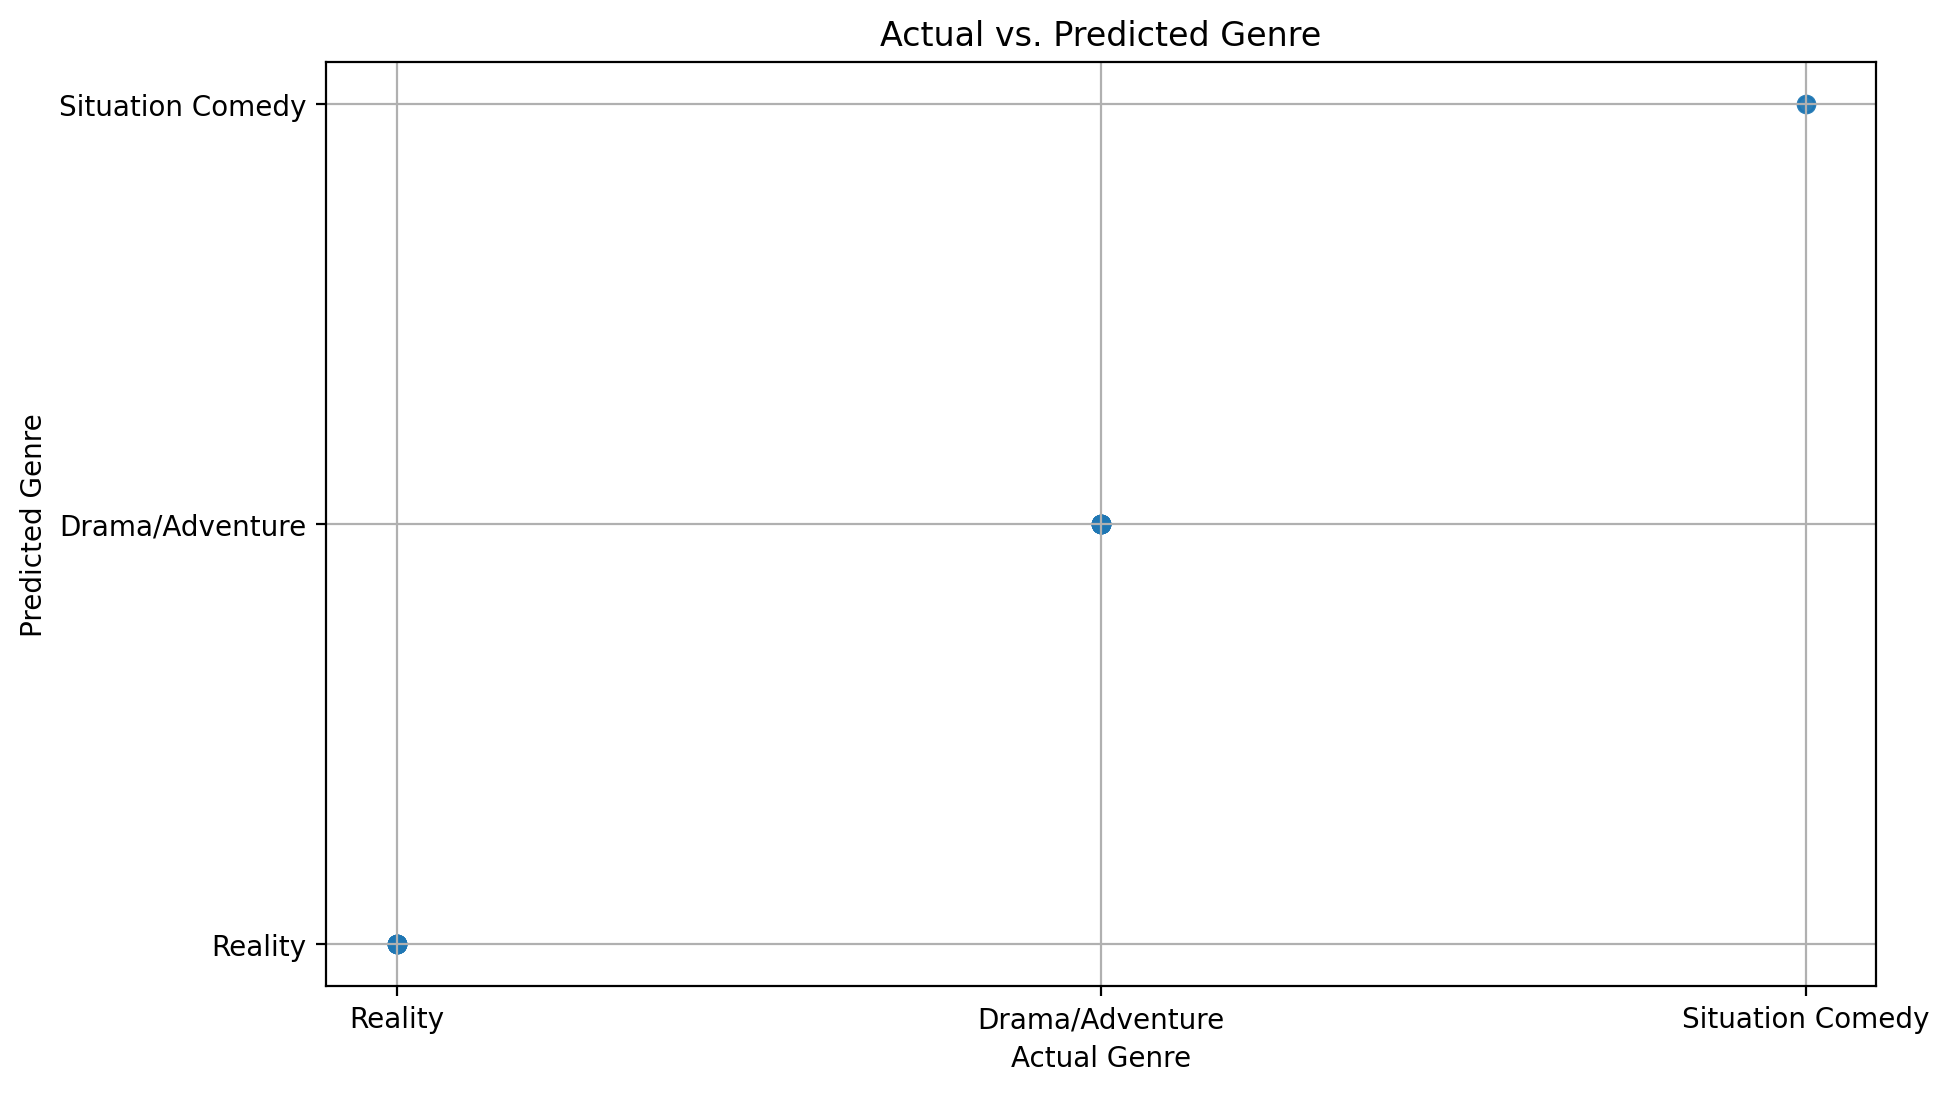

In [50]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(y, pred_genre, alpha=0.5)
plt.xlabel('Actual Genre')
plt.ylabel('Predicted Genre')
plt.title('Actual vs. Predicted Genre')
plt.grid(True)
plt.show()

## SHAP value

- Different from *relative importance*.
- More interpretable, showing magnitude.

In [51]:
explainer = shap.Explainer(clf)  # RandomForestClassifier
shap_values = explainer(X)

In [52]:
y

0              Reality
1      Drama/Adventure
2              Reality
3              Reality
4              Reality
5              Reality
6              Reality
7              Reality
8              Reality
9              Reality
10             Reality
11             Reality
12             Reality
13     Drama/Adventure
14     Drama/Adventure
15     Drama/Adventure
16     Drama/Adventure
17     Drama/Adventure
18             Reality
19     Drama/Adventure
20     Drama/Adventure
21     Drama/Adventure
22    Situation Comedy
23             Reality
24    Situation Comedy
25     Drama/Adventure
26             Reality
27     Drama/Adventure
28     Drama/Adventure
29     Drama/Adventure
30             Reality
31     Drama/Adventure
32    Situation Comedy
33     Drama/Adventure
34    Situation Comedy
35     Drama/Adventure
36             Reality
37     Drama/Adventure
38     Drama/Adventure
39     Drama/Adventure
Name: Genre, dtype: object

Class: Drama/Adventure


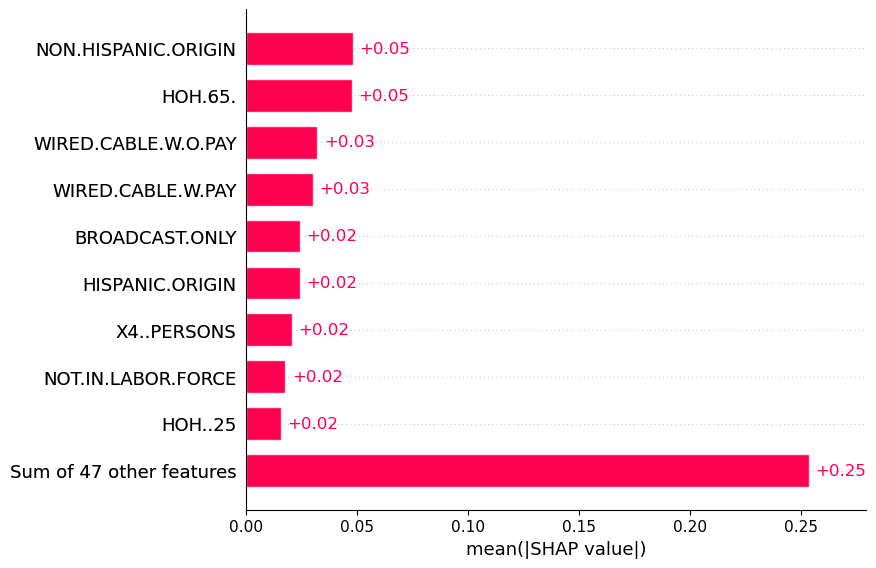

Class: Reality


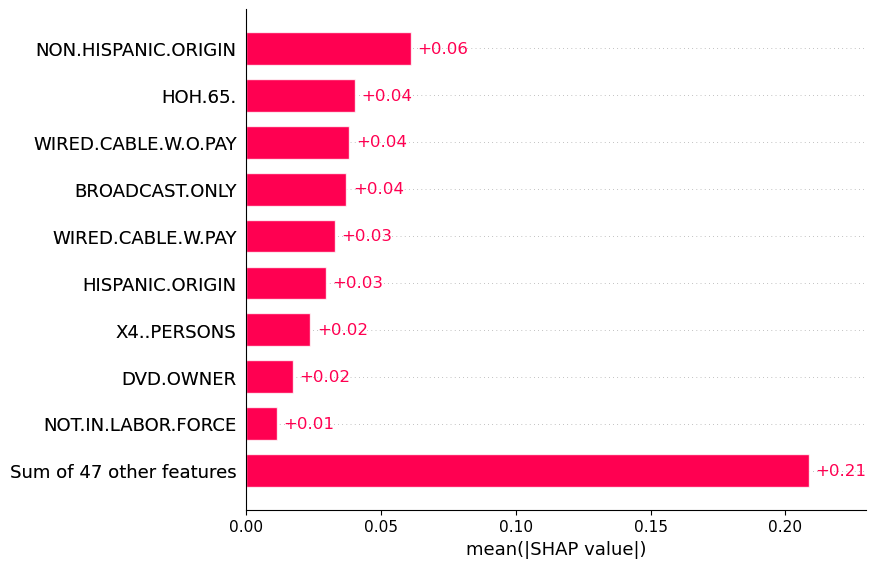

Class: Situation Comedy


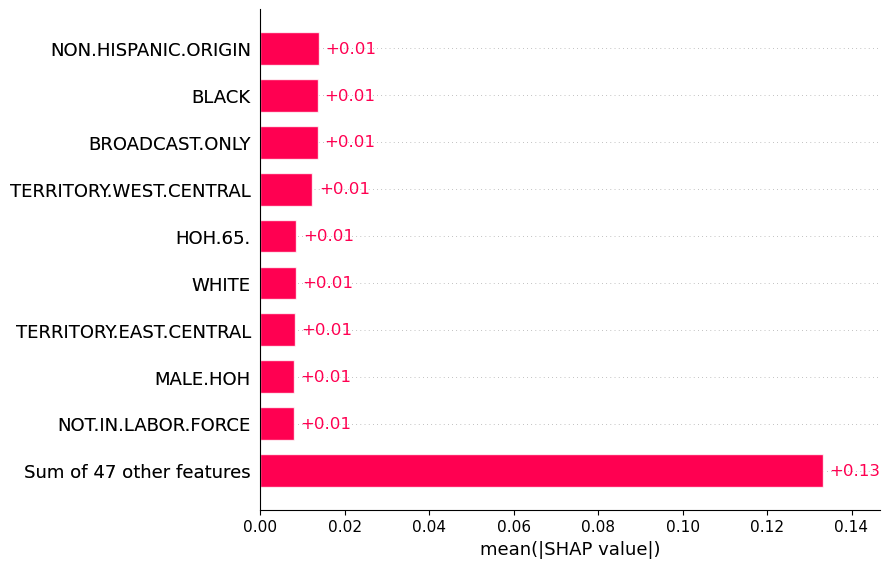

In [53]:
n_classes = shap_values.values.shape[2]
for i in range(n_classes):
    print(f"Class: {clf.classes_[i]}")  # type: ignore
    shap.plots.bar(shap_values[:,:,i])

## California housing

Let's load some data. We'll focus on median home values in various census tracts (8057 for 39.5 million people). Latitude and longitude are for centroids of the tract. Our response value will be `log(medianhomeval)`.

In [54]:
CAhousing = pd.read_csv("https://www.dropbox.com/s/0bvp7e7kk8hipvf/CAhousing.csv?dl=1")

CAhousing['AveBedrms'] = CAhousing['totalBedrooms'] / CAhousing['households']
CAhousing['AveRooms'] = CAhousing['totalRooms'] / CAhousing['households']
CAhousing['AveOccupancy'] = CAhousing['population'] / CAhousing['households']

logMedVal = np.log(CAhousing['medianHouseValue'])
CAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
 9   AveBedrms         20640 non-null  float64
 10  AveRooms          20640 non-null  float64
 11  AveOccupancy      20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [55]:
CAhousing = CAhousing.drop(columns=['totalRooms', 'totalBedrooms', 'medianHouseValue'])
CAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   population        20640 non-null  float64
 4   households        20640 non-null  float64
 5   medianIncome      20640 non-null  float64
 6   AveBedrms         20640 non-null  float64
 7   AveRooms          20640 non-null  float64
 8   AveOccupancy      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [56]:
CAhousing.head()

longitude  latitude  housingMedianAge  population  households  \
0    -122.23     37.88              41.0       322.0       126.0   
1    -122.22     37.86              21.0      2401.0      1138.0   
2    -122.24     37.85              52.0       496.0       177.0   
3    -122.25     37.85              52.0       558.0       219.0   
4    -122.25     37.85              52.0       565.0       259.0   

   medianIncome  AveBedrms  AveRooms  AveOccupancy  
0        8.3252   1.023810  6.984127      2.555556  
1        8.3014   0.971880  6.238137      2.109842  
2        7.2574   1.073446  8.288136      2.802260  
3        5.6431   1.073059  5.817352      2.547945  
4        3.8462   1.081081  6.281853      2.181467

In [57]:
scaled_data = pd.DataFrame(scale(CAhousing), columns=CAhousing.columns) # type: ignore

In [58]:
main_effects = '(' + ' + '.join(scaled_data.columns.difference(['longitude', 'latitude'])) +')'
formula = f'population~ {main_effects} * longitude * latitude'
formula

'population~ (AveBedrms + AveOccupancy + AveRooms + households + housingMedianAge + medianIncome + population) * longitude * latitude'

In [59]:
response, XXca = patsy.dmatrices(formula, data=scaled_data, return_type='dataframe') # type: ignore
XXca = XXca.drop('Intercept', axis=1)

In [60]:
XXca.head()

AveBedrms  AveOccupancy  AveRooms  households  housingMedianAge  \
0  -0.153758     -0.049597  0.628559   -0.977033          0.982143   
1  -0.263336     -0.092512  0.327041    1.669961         -0.607019   
2  -0.049016     -0.025843  1.155620   -0.843637          1.856182   
3  -0.049833     -0.050329  0.156966   -0.733781          1.856182   
4  -0.032906     -0.085616  0.344711   -0.629157          1.856182   

   medianIncome  population  longitude  AveBedrms:longitude  \
0      2.344766   -0.974429  -1.327835             0.204165   
1      2.332238    0.861439  -1.322844             0.348352   
2      1.782699   -0.820777  -1.332827             0.065330   
3      0.932968   -0.766028  -1.337818             0.066667   
4     -0.012881   -0.759847  -1.337818             0.044022   

   AveOccupancy:longitude  ...  medianIncome:latitude  population:latitude  \
0                0.065856  ...               2.467979            -1.025633   
1                0.122379  ...               2.432955             0.898640   
2                0.034444  ...               1.851338            -0.852379   
3                0.067331  ...               0.968889            -0.795522   
4                0.114538  ...              -0.013377            -0.789103   

   longitude:latitude  AveBedrms:longitude:latitude  \
0           -1.397611                      0.214893   
1           -1.379970                      0.363396   
2           -1.384144                      0.067846   
3           -1.389327                      0.069234   
4           -1.389327                      0.045717   

   AveOccupancy:longitude:latitude  AveRooms:longitude:latitude  \
0                         0.069317                    -0.878481   
1                         0.127664                    -0.451307   
2                         0.035770                    -1.599545   
3                         0.069924                    -0.218077   
4                         0.118948                    -0.478916   

   households:longitude:latitude  housingMedianAge:longitude:latitude  \
0                       1.365512                            -1.372653   
1                      -2.304497                             0.837668   
2                       1.167715                            -2.569222   
3                       1.019463                            -2.578844   
4                       0.874105                            -2.578844   

   medianIncome:longitude:latitude  population:longitude:latitude  
0                        -3.277070                       1.361872  
1                        -3.218419                      -1.188760  
2                        -2.467513                       1.136074  
3                        -1.296197                       1.064264  
4                         0.017896                       1.055676  

[5 rows x 31 columns]

In [61]:
lasso_cv = LassoCV(cv=5)

# Fit LassoCV model
lasso_cv.fit(XXca, logMedVal)

LassoCV(cv=5)

In [62]:
print(f"Optimal alpha: {lasso_cv.alpha_}")

y_pred = lasso_cv.predict(XXca)

mse = mean_squared_error(logMedVal, y_pred)
print(f"MSE: {mse}")

Optimal alpha: 0.0017393260512235172
MSE: 0.10779406809977236


In [63]:
regtree = DecisionTreeRegressor(min_samples_leaf=50)
regtree.fit(XXca, logMedVal)

DecisionTreeRegressor(min_samples_leaf=50)

In [64]:
y_pred = regtree.predict(XXca)

mse = mean_squared_error(logMedVal, y_pred)
print(f"MSE: {mse}")

MSE: 0.06699595440784424


In [65]:
# prune it
regtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
regtree.fit(XXca, logMedVal)
path = regtree.cost_complexity_pruning_path(XXca, logMedVal)
ccp_alphas = path.ccp_alphas

scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha, min_samples_leaf=50)
    score = np.mean(cross_val_score(tree, XXca, logMedVal, cv=cv))  # Using 5-fold CV
    scores.append(score)

best_alpha = ccp_alphas[np.argmax(scores)]
best_alpha

np.float64(0.0)

In [66]:
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, min_samples_leaf=50)
pruned_tree.fit(XXca, logMedVal)

DecisionTreeRegressor(ccp_alpha=np.float64(0.0), min_samples_leaf=50)

In [67]:
y_pred = pruned_tree.predict(XXca)

mse = mean_squared_error(logMedVal, y_pred)
print(f"MSE: {mse}")

MSE: 0.06699595440784424


In [68]:
rf_reg = RandomForestRegressor()
rf_reg.fit(XXca, logMedVal)

RandomForestRegressor()

In [69]:
y_pred = rf_reg.predict(XXca)

mse = mean_squared_error(logMedVal, y_pred)
print(f"MSE: {mse}")

MSE: 0.007381882972972825


## SHAP value

In [70]:
XXca[:100]

AveBedrms  AveOccupancy  AveRooms  households  housingMedianAge  \
0   -0.153758     -0.049597  0.628559   -0.977033          0.982143   
1   -0.263336     -0.092512  0.327041    1.669961         -0.607019   
2   -0.049016     -0.025843  1.155620   -0.843637          1.856182   
3   -0.049833     -0.050329  0.156966   -0.733781          1.856182   
4   -0.032906     -0.085616  0.344711   -0.629157          1.856182   
..        ...           ...       ...         ...               ...   
95  -0.064110     -0.151874 -1.267114    4.769455          0.584852   
96   0.066029     -0.128547 -0.620054    1.779817          0.187562   
97   0.167017     -0.081927 -0.706387   -1.068579          0.028646   
98  -0.170237     -0.139754 -1.003753    1.962909         -0.527561   
99   0.022088     -0.115075 -0.695949    1.256695          0.664310   

    medianIncome  population  longitude  AveBedrms:longitude  \
0       2.344766   -0.974429  -1.327835             0.204165   
1       2.332238    0.861439  -1.322844             0.348352   
2       1.782699   -0.820777  -1.332827             0.065330   
3       0.932968   -0.766028  -1.337818             0.066667   
4      -0.012881   -0.759847  -1.337818             0.044022   
..           ...         ...        ...                  ...   
95     -0.979627    1.804540  -1.342809             0.086087   
96     -0.545418    0.549721  -1.342809            -0.088664   
97     -0.981416   -1.080395  -1.342809            -0.224271   
98     -1.396044    0.528528  -1.342809             0.228596   
99     -0.663379    0.364280  -1.342809            -0.029661   

    AveOccupancy:longitude  ...  medianIncome:latitude  population:latitude  \
0                 0.065856  ...               2.467979            -1.025633   
1                 0.122379  ...               2.432955             0.898640   
2                 0.034444  ...               1.851338            -0.852379   
3                 0.067331  ...               0.968889            -0.795522   
4                 0.114538  ...              -0.013377            -0.789103   
..                     ...  ...                    ...                  ...   
95                0.203937  ...              -0.994413             1.831776   
96                0.172614  ...              -0.558757             0.563166   
97                0.110012  ...              -1.000824            -1.101760   
98                0.187663  ...              -1.430187             0.541454   
99                0.154524  ...              -0.679603             0.373189   

    longitude:latitude  AveBedrms:longitude:latitude  \
0            -1.397611                      0.214893   
1            -1.379970                      0.363396   
2            -1.384144                      0.067846   
3            -1.389327                      0.069234   
4            -1.389327                      0.045717   
..                 ...                           ...   
95           -1.363077                      0.087386   
96           -1.375650                     -0.090832   
97           -1.369363                     -0.228706   
98           -1.375650                      0.234186   
99           -1.375650                     -0.030386   

    AveOccupancy:longitude:latitude  AveRooms:longitude:latitude  \
0                          0.069317                    -0.878481   
1                          0.127664                    -0.451307   
2                          0.035770                    -1.599545   
3                          0.069924                    -0.218077   
4                          0.118948                    -0.478916   
..                              ...                          ...   
95                         0.207015                     1.727173   
96                         0.176836                     0.852978   
97                         0.112188                     0.967300   
98                         0.192252                     1.380814   
99          

In [71]:
explainer = shap.Explainer(rf_reg)  # RandomForestClassifier
shap_values = explainer(XXca[:100])

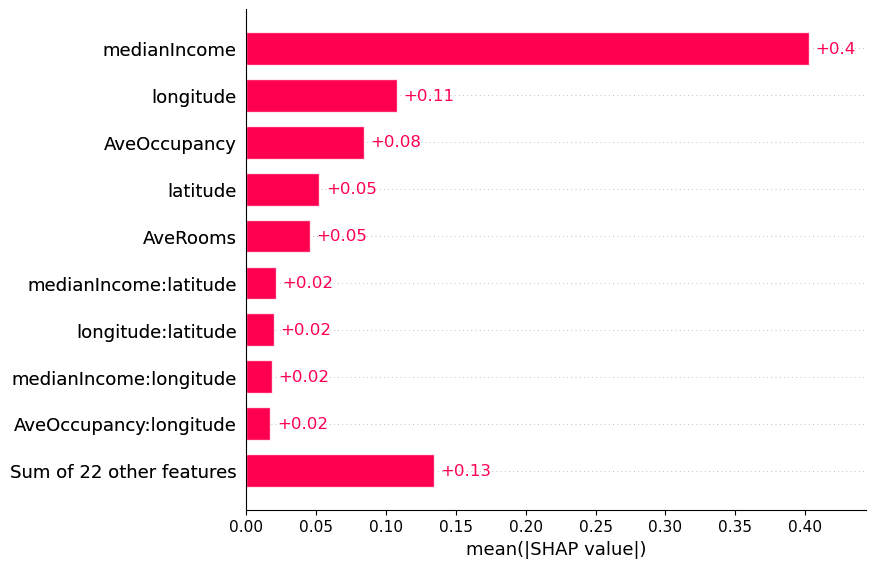

In [72]:
shap.plots.bar(shap_values)

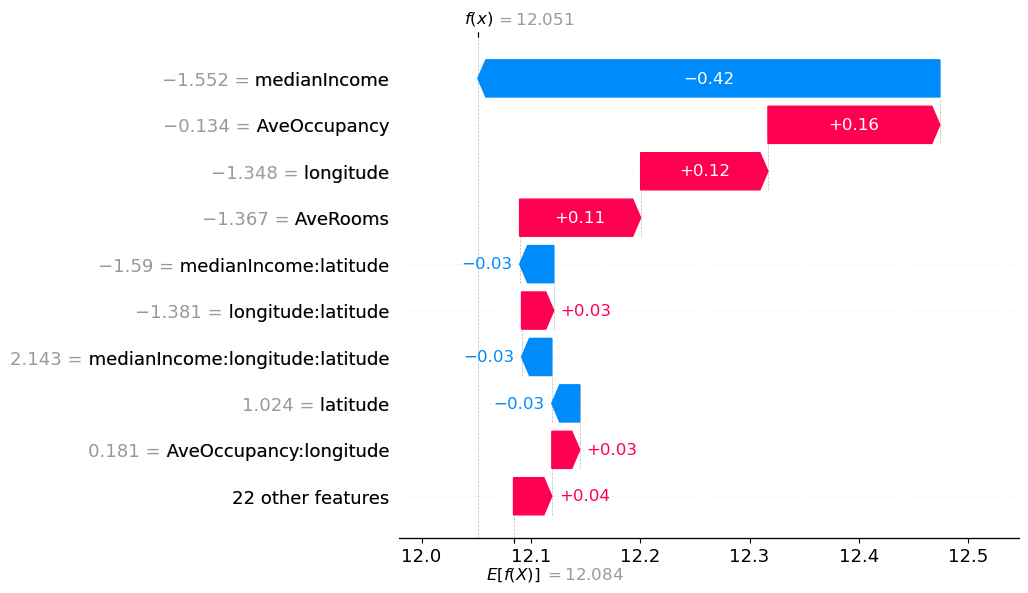

In [74]:
shap.plots.waterfall(shap_values[50])

## OOS performance

In [75]:
CAhousing = pd.read_csv("https://www.dropbox.com/s/0bvp7e7kk8hipvf/CAhousing.csv?dl=1")

CAhousing['AveBedrms'] = CAhousing['totalBedrooms'] / CAhousing['households']
CAhousing['AveRooms'] = CAhousing['totalRooms'] / CAhousing['households']
CAhousing['AveOccupancy'] = CAhousing['population'] / CAhousing['households']
logMedVal = np.log(CAhousing['medianHouseValue'])
CAhousing = CAhousing.drop(columns=['totalRooms', 'totalBedrooms', 'medianHouseValue'])

scaled_data = pd.DataFrame(scale(CAhousing), columns=CAhousing.columns) # type: ignore
main_effects = '(' + ' + '.join(scaled_data.columns.difference(['longitude', 'latitude'])) +')'
formula = f'population~ {main_effects} * longitude * latitude'

response, XXca = patsy.dmatrices(formula, data=scaled_data, return_type='dataframe') # type: ignore
XXca = XXca.drop('Intercept', axis=1)


X_train, X_test, y_train, y_test = train_test_split(XXca, logMedVal, test_size=0.2, random_state=0)

In [76]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.1334410215116184


In [77]:
# prune it
regtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=40)
regtree.fit(X_train, y_train)
path = regtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

scores = []
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha, max_depth=5, min_samples_leaf=40)
    score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))  # Using 5-fold CV
    scores.append(score)

best_alpha = ccp_alphas[np.argmax(scores)]
best_alpha

np.float64(0.0)

In [78]:
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, max_depth=5, min_samples_leaf=50)
pruned_tree.fit(X_train, y_train)
y_pred = pruned_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.13392732378588704


In [79]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.05608427694970718
